### Importing the dataset

In [1]:
# Importing the necessary modules.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from statistics import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the xlsx file.
Telecom_data = pd.read_excel('Week2_challenge_data_source.xlsx')

### Data understanding

In [3]:
# the number of elements in this object.
Telecom_data.size

8250055

In [4]:
# shape:representing the dimensionality of the DataFrame.
Telecom_data.shape

(150001, 55)

In [5]:
# dtypes in the DataFrame.
Telecom_data.dtypes

Bearer Id                                           object
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float

### Summary.

In [6]:
# info(): summary of a DataFrame.
Telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [7]:
# describe(): Generates descriptive statistics
Telecom_data.describe()

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,1120.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,58613.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [8]:
# Data glance head():gives the first observations.
Telecom_data.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


### Checking for missing values

In [9]:
# Any missing values
Telecom_data.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

#### Unique values.

In [10]:
Telecom_data.nunique()

Bearer Id                                   134709
Start                                       111881
Start ms                                      1000
End                                         100962
End ms                                        1000
Dur. (ms)                                    89525
IMSI                                        107265
MSISDN/Number                               106856
IMEI                                        107270
Last Location Name                           45547
Avg RTT DL (ms)                               2130
Avg RTT UL (ms)                                722
Avg Bearer TP DL (kbps)                      41753
Avg Bearer TP UL (kbps)                      14528
TCP DL Retrans. Vol (Bytes)                  54399
TCP UL Retrans. Vol (Bytes)                  35120
DL TP < 50 Kbps (%)                            100
50 Kbps < DL TP < 250 Kbps (%)                  84
250 Kbps < DL TP < 1 Mbps (%)                   73
DL TP > 1 Mbps (%)             

#### Fixing the missing values for the variables of interest.
##### Handset type

In [10]:
# Checking the most used handset
Telecom_data['Handset Type'].value_counts()

# Imputing the missing value in 'Handset type' with 'Huawei B528S-23A'
Telecom_data['Handset Type'].fillna('Huawei B528S-23A', inplace=True)

# Checking if the column 'Handset Type' have any missing values
Telecom_data['Handset Type'].isnull().sum()


0

##### Duration of sessions

In [11]:
# Computing the mean value for 'Dur. (ms).1' column
Dur_mean_value = Telecom_data['Dur. (ms).1'].mean()

Telecom_data['Dur. (ms).1'].fillna(Dur_mean_value, inplace=True)

Telecom_data['Dur. (ms).1'].isnull().sum()


0

##### Handset manufacturer

In [12]:
# Checking the top  handset manufacturer
Telecom_data['Handset Manufacturer'].value_counts()
# Imputing the missing value in 'handset manufacturer' with 'Apple'
Telecom_data.loc[Telecom_data['Handset Manufacturer'].isnull(), 'Handset Manufacturer'] = 'Apple'
# Checking if the column 'handset manufacturer' have any missing values
Telecom_data['Handset Manufacturer'].isnull().sum()

0

##### Total UL

In [13]:
# Computing the mean value for 'Total UL' column
totalUL_mean_value = Telecom_data['Total UL (Bytes)'].mean()

Telecom_data['Total UL (Bytes)'].fillna(totalUL_mean_value, inplace=True)

Telecom_data['Total UL (Bytes)'].isnull().sum()

0

##### Total DL

In [14]:
# Computing the mean value for 'Total DL' column
totalDL_mean_value = Telecom_data['Total UL (Bytes)'].mean()

Telecom_data['Total DL (Bytes)'].fillna(totalDL_mean_value, inplace=True)

Telecom_data['Total DL (Bytes)'].isnull().sum()

0

#### Avg RTT DL (ms)

In [15]:
# Computing the mean value for 'Total DL' column
RTT_DL_mean_value = Telecom_data['Avg RTT DL (ms)'].mean()

Telecom_data['Avg RTT DL (ms)'].fillna(RTT_DL_mean_value, inplace=True)

Telecom_data['Avg RTT DL (ms)'].isnull().sum()

0

#### Avg RTT UL (ms)

In [16]:
RTT_UL_mean_value = Telecom_data['Avg RTT UL (ms)'].mean()

Telecom_data['Avg RTT UL (ms)'].fillna(RTT_UL_mean_value, inplace=True)

Telecom_data['Avg RTT UL (ms)'].isnull().sum()

0

#### Avg Bearer TP DL (kbps)

In [17]:
TP_DL_mean_value = Telecom_data['Avg Bearer TP DL (kbps)'].mean()

Telecom_data['Avg Bearer TP DL (kbps)'].fillna(TP_DL_mean_value, inplace=True)

Telecom_data['Avg Bearer TP DL (kbps)'].isnull().sum()

0

#### Avg Bearer TP UL (kbps)

In [18]:
TP_UL_mean_value = Telecom_data['Avg Bearer TP UL (kbps)'].mean()

Telecom_data['Avg Bearer TP UL (kbps)'].fillna(TP_UL_mean_value, inplace=True)

Telecom_data['Avg Bearer TP UL (kbps)'].isnull().sum()

0

#### TCP DL Retrans. Vol (Bytes)

In [19]:
TCP_DL_mean_value = Telecom_data['TCP DL Retrans. Vol (Bytes)'].mean()

Telecom_data['TCP DL Retrans. Vol (Bytes)'].fillna(TCP_DL_mean_value, inplace=True)

Telecom_data['TCP DL Retrans. Vol (Bytes)'].isnull().sum()

0

#### TCP UL Retrans. Vol (Bytes)

In [20]:
TCP_UL_mean_value = Telecom_data['TCP UL Retrans. Vol (Bytes)'].mean()

Telecom_data['TCP UL Retrans. Vol (Bytes)'].fillna(TCP_UL_mean_value, inplace=True)

Telecom_data['TCP UL Retrans. Vol (Bytes)'].isnull().sum()

0

In [21]:
## Confirming any missing values after imputation 
Telecom_data.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                                  0
Avg RTT UL (ms)                                  0
Avg Bearer TP DL (kbps)                          0
Avg Bearer TP UL (kbps)                          0
TCP DL Retrans. Vol (Bytes)                      0
TCP UL Retrans. Vol (Bytes)                      0
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

#### Detecting outliers.
##### Distributions.

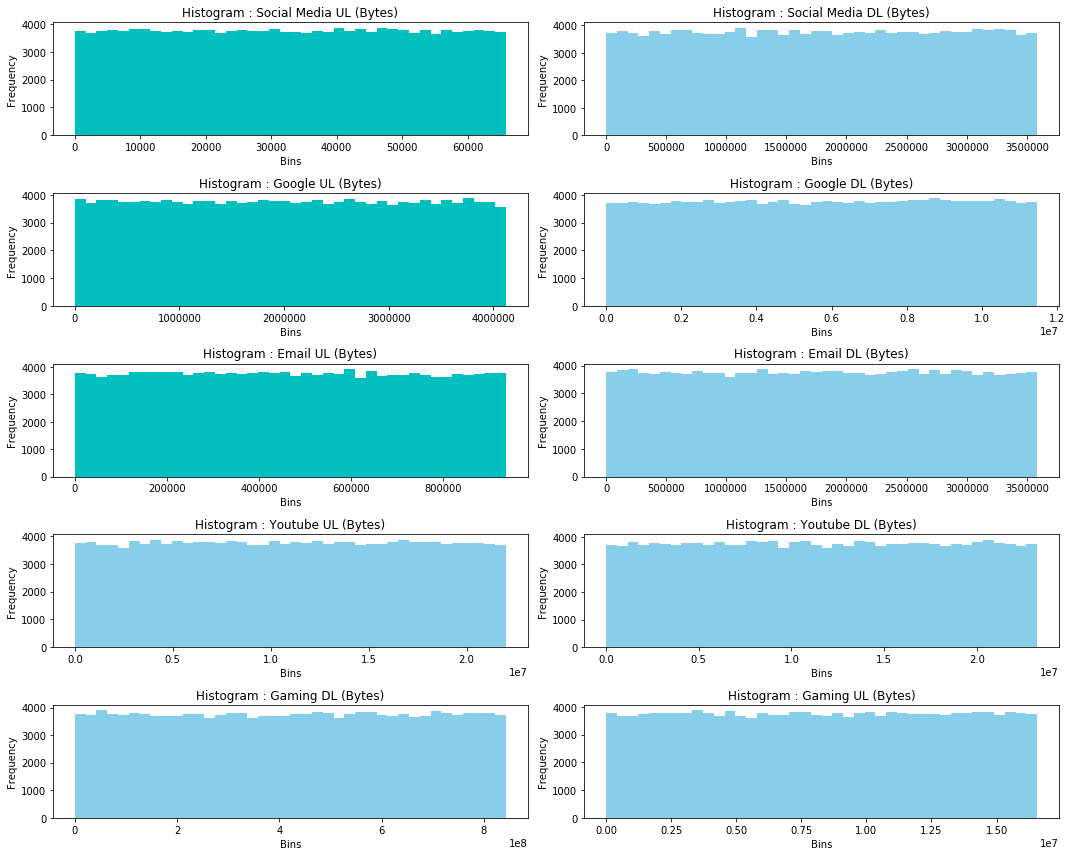

In [23]:
f, ax_arr = plt.subplots(5,2, figsize=(15,12))

# Plot 1.1
ax_arr[0,0].hist(Telecom_data['Social Media UL (Bytes)'], bins=40, color='c')
ax_arr[0,0].set_title('Histogram : Social Media UL (Bytes)')
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Frequency')

# Plot 1.2
ax_arr[0,1].hist(Telecom_data['Social Media DL (Bytes)'], bins=40, color='skyblue')
ax_arr[0,1].set_title('Histogram : Social Media DL (Bytes)')
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Frequency')

# Plot 2.1
ax_arr[1,0].hist(Telecom_data['Google UL (Bytes)'], bins=40, color='c')
ax_arr[1,0].set_title('Histogram : Google UL (Bytes)')
ax_arr[1,0].set_xlabel('Bins')
ax_arr[1,0].set_ylabel('Frequency')

# Plot 2.2
ax_arr[1,1].hist(Telecom_data['Google DL (Bytes)'], bins=40, color='skyblue')
ax_arr[1,1].set_title('Histogram : Google DL (Bytes)')
ax_arr[1,1].set_xlabel('Bins')
ax_arr[1,1].set_ylabel('Frequency')

# Plot 3.1
ax_arr[2,0].hist(Telecom_data['Email UL (Bytes)'], bins=40, color='c')
ax_arr[2,0].set_title('Histogram : Email UL (Bytes)')
ax_arr[2,0].set_xlabel('Bins')
ax_arr[2,0].set_ylabel('Frequency')

# Plot 3.2
ax_arr[2,1].hist(Telecom_data['Email DL (Bytes)'], bins=40, color='skyblue')
ax_arr[2,1].set_title('Histogram : Email DL (Bytes)')
ax_arr[2,1].set_xlabel('Bins')
ax_arr[2,1].set_ylabel('Frequency')


# Plot 4.1
ax_arr[3,0].hist(Telecom_data['Youtube UL (Bytes)'], bins=40, color='skyblue')
ax_arr[3,0].set_title('Histogram : Youtube UL (Bytes)')
ax_arr[3,0].set_xlabel('Bins')
ax_arr[3,0].set_ylabel('Frequency')

# Plot 4.2
ax_arr[3,1].hist(Telecom_data['Youtube DL (Bytes)'], bins=40, color='skyblue')
ax_arr[3,1].set_title('Histogram : Youtube DL (Bytes)')
ax_arr[3,1].set_xlabel('Bins')
ax_arr[3,1].set_ylabel('Frequency')

# Plot 5.1
ax_arr[4,0].hist(Telecom_data['Gaming DL (Bytes)'], bins=40, color='skyblue')
ax_arr[4,0].set_title('Histogram : Gaming DL (Bytes)')
ax_arr[4,0].set_xlabel('Bins')
ax_arr[4,0].set_ylabel('Frequency')

# Plot 5.2
ax_arr[4,1].hist(Telecom_data['Gaming UL (Bytes)'], bins=40, color='skyblue')
ax_arr[4,1].set_title('Histogram : Gaming UL (Bytes)')
ax_arr[4,1].set_xlabel('Bins')
ax_arr[4,1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

#### Conclusion: 
##### *From the distribution, the variables of interests have minimal outlier's*

### *Top Handset Types used*

In [22]:
## Getting the top used handets used by the customers
Handset_count = Telecom_data['Handset Type'].value_counts()


In [23]:
### Dropping the undefined handset
Handset_count_clean = Telecom_data[Telecom_data["Handset Type"] != 'undefined']

Handset_count_clean = Handset_count_clean['Handset Type'].value_counts()[:10]

Text(0, 0.5, 'Frequency')

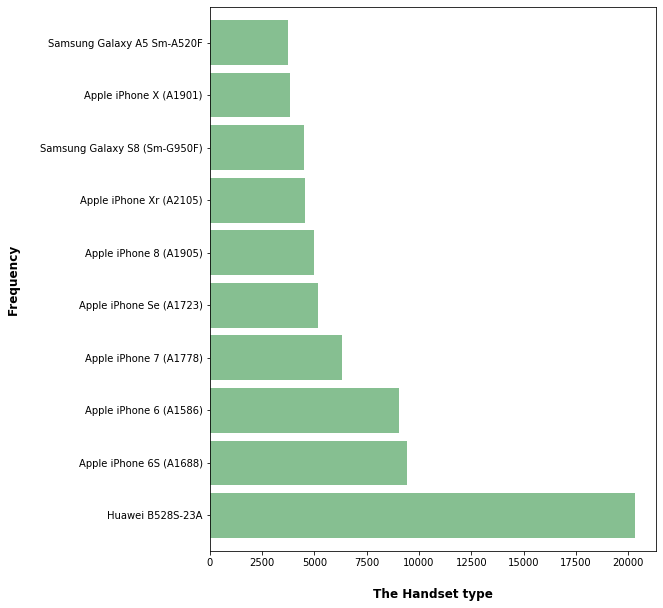

In [24]:
## Visual.
ax = Handset_count_clean.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)
# Set x-axis label
ax.set_xlabel("The Handset type", labelpad=20, weight='bold', size=12)
# Set y-axis label
ax.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

### *Top  handset manufacturer*

In [25]:
Manufacturer_count = Telecom_data['Handset Manufacturer'].value_counts()

In [26]:
### Dropping the undefined handset
Manufacturer_count_clean = Telecom_data[Telecom_data["Handset Manufacturer"] != 'undefined']

Manufacturer_count_clean = Manufacturer_count_clean['Handset Manufacturer'].value_counts()[:3]

Text(0, 0.5, 'Number of handsets manufactured')

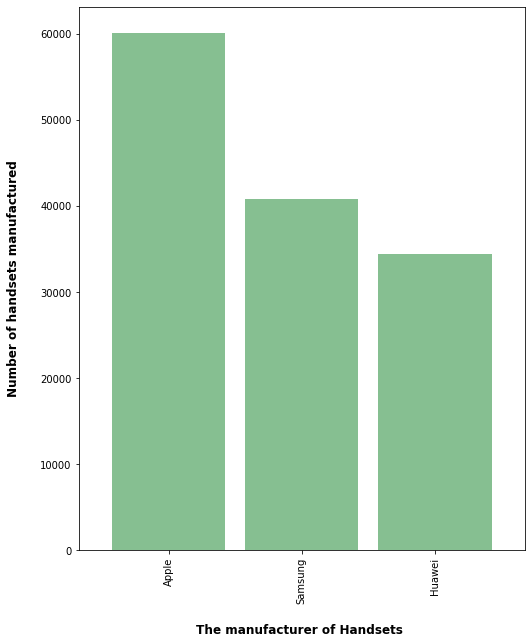

In [27]:
ax = Manufacturer_count_clean.plot(kind='bar', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)
# Set x-axis label
ax.set_xlabel("The manufacturer of Handsets ", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Number of handsets manufactured", labelpad=20, weight='bold', size=12)

In [28]:
### Picking the top 3 Handset manufacturer's
Handset_count_top = Telecom_data[(Telecom_data['Handset Manufacturer']  == 'Apple') |
                                 (Telecom_data['Handset Manufacturer']  == 'Samsung') |
                                 (Telecom_data['Handset Manufacturer'] == 'Huawei')]
Handset_count_top = Handset_count_top.groupby(['Handset Manufacturer'])['Handset Type'].value_counts()
Handset_count_top 

Handset Manufacturer  Handset Type           
Apple                 Apple iPhone 6S (A1688)    9419
                      Apple iPhone 6 (A1586)     9023
                      Apple iPhone 7 (A1778)     6326
                      Apple iPhone Se (A1723)    5187
                      Apple iPhone 8 (A1905)     4993
                                                 ... 
Samsung               Samsung Gt-P5220              1
                      Samsung Gt-S5280              1
                      Samsung Gt-S6310N             1
                      Samsung Metro 350             1
                      Samsung Sm-T235               1
Name: Handset Type, Length: 426, dtype: int64

## USER OVERVIEW ANALYSIS

In [29]:
## Picking the columns of interest.
Telecom_filtered_data = Telecom_data[['Bearer Id','MSISDN/Number','Dur. (ms).1','Handset Manufacturer',
       'Handset Type','Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
        'Total UL (Bytes)', 'Total DL (Bytes)','Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']]


In [30]:
#  df = df.rename(columns = {'old column name':'new column name'})

Telecom_filtered_data= Telecom_filtered_data.rename(columns = {'Avg RTT DL (ms)':'Avg_RTT_DL',
                                                               'Avg RTT UL (ms)':'Avg_RTT_UL', 
                                                               'Avg Bearer TP DL (kbps)':'Avg_TP_DL',
                                                               'Avg Bearer TP UL (kbps)':'Avg_TP_UL',
                                                           'TCP DL Retrans. Vol (Bytes)':'TCP_DL_Retrans',
                                                               'TCP UL Retrans. Vol (Bytes)':'TCP_UL_Retrans',
                                                               'Social Media UL (Bytes)' : 'Social_Media_UL',
                                                               'Social Media DL (Bytes)' : 'Social_Media_DL',
                                                              'Google DL (Bytes)' : 'Google_DL',
                                                               'Google UL (Bytes)' : 'Google_UL',
                                                              'Email DL (Bytes)' : 'Email_DL',
                                                               'Email UL (Bytes)' : 'Email_UL',
                                                               'Netflix DL (Bytes)' : 'Netflix_DL',
                                                               'Netflix UL (Bytes)' : 'Netflix_UL',
                                                               'Gaming DL (Bytes)' : 'Gaming_DL',
                                                               'Gaming UL (Bytes)' : 'Gaming_UL',
                                                               'Other DL (Bytes)': 'Other_DL',
                                                               'Other UL (Bytes)' : 'Other_UL',
                                                              'Youtube DL (Bytes)': 'Youtube_DL',
                                                               'Youtube UL (Bytes)' : 'Youtube_UL',
                                                              'Total UL (Bytes)' :'Total_UL',
                                                               'Total DL (Bytes)' :'Total_DL'})

In [32]:
## checking for null variables.
Telecom_filtered_data.isnull().sum()

Bearer Id                  0
MSISDN/Number           1066
Dur. (ms).1                0
Handset Manufacturer       0
Handset Type               0
Avg_RTT_DL                 0
Avg_RTT_UL                 0
Avg_TP_DL                  0
Avg_TP_UL                  0
TCP_DL_Retrans             0
TCP_UL_Retrans             0
Total_UL                   0
Total_DL                   0
Social_Media_DL            0
Social_Media_UL            0
Google_DL                  0
Google_UL                  0
Email_DL                   0
Email_UL                   0
Youtube_DL                 0
Youtube_UL                 0
Netflix_DL                 0
Netflix_UL                 0
Gaming_DL                  0
Gaming_UL                  0
Other_DL                   0
Other_UL                   0
dtype: int64

 #### Since MSISDN/Number is a unique identifier, it is prudent to drop it than impute

In [33]:
Telecom_filtered_data = Telecom_filtered_data.dropna()
#Telecom_filtered_data.isnull().sum()


In [34]:
Telecom_filtered_data.eval('Total_DV_SocialMedia =  Social_Media_UL + Social_Media_DL',inplace=True)
Telecom_filtered_data.eval('Total_DV_Google =  Google_DL  + Google_UL',inplace=True)
Telecom_filtered_data.eval('Total_DV_Email =  Email_DL  + Email_UL',inplace=True)
Telecom_filtered_data.eval('Total_DV_Youtube =  Youtube_DL  + Youtube_UL',inplace=True)
Telecom_filtered_data.eval('Total_DV_Netflix =  Netflix_DL  + Netflix_UL',inplace=True)
Telecom_filtered_data.eval('Total_DV_Gaming =  Gaming_DL  + Gaming_UL',inplace=True)
Telecom_filtered_data.eval('Total_DV_Other =  Other_UL  + Other_DL ',inplace=True)
Telecom_filtered_data.eval('Total_DataVolume =  Total_DL  + Total_UL ',inplace=True)
Telecom_filtered_data.eval('Total_RTT_DL =  Avg_RTT_UL  + Avg_RTT_DL',inplace=True)
Telecom_filtered_data.eval('Total_TP_DL =  Avg_TP_UL  + Avg_TP_DL ',inplace=True)
Telecom_filtered_data.eval('Total_TCP_Retrans =  TCP_DL_Retrans  + TCP_UL_Retrans ',inplace=True)
Telecom_filtered_data

,Bearer Id,MSISDN/Number,Dur. (ms).1,Handset Manufacturer,Handset Type,Avg_RTT_DL,Avg_RTT_UL,Avg_TP_DL,Avg_TP_UL,TCP_DL_Retrans,...,Total_DV_Google,Total_DV_Email,Total_DV_Youtube,Total_DV_Netflix,Total_DV_Gaming,Total_DV_Other,Total_DataVolume,Total_RTT_DL,Total_TP_DL,Total_TCP_Retrans
0,13114483460844900352,3.366496e+10,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,42.000000,5.000000,23.0,44.0,2.080991e+07,...,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0,47.000000,67.0,2.156957e+07
1,13114483482878900224,3.368185e+10,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),65.000000,5.000000,16.0,26.0,2.080991e+07,...,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0,70.000000,42.0,2.156957e+07
2,13114483484080500736,3.376063e+10,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),109.795706,17.662883,6.0,9.0,2.080991e+07,...,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0,127.458589,15.0,2.156957e+07
3,13114483485442799616,3.375034e+10,1.321510e+09,undefined,undefined,109.795706,17.662883,44.0,44.0,2.080991e+07,...,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0,127.458589,88.0,2.156957e+07
4,13114483499480700928,3.369980e+10,1.089009e+09,Samsung,Samsung Sm-G390F,109.795706,17.662883,6.0,9.0,2.080991e+07,...,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0,127.458589,15.0,2.156957e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,13042425979329300480,3.366865e+10,5.958779e+07,undefined,undefined,313.000000,9.000000,63420.0,1393.0,1.655285e+07,...,1265634.0,4280107.0,24553645.0,29618711.0,797160102.0,336273648.0,872761860.0,322.000000,64813.0,1.671546e+07
149996,7277825670196679680,3.365069e+10,8.123076e+07,Apple,Apple iPhone 8 Plus (A1897),32.000000,0.000000,52.0,65.0,2.080991e+07,...,12784914.0,690876.0,27955095.0,37561864.0,535806880.0,16751926.0,631804110.0,32.000000,117.0,2.156957e+07
149997,7349883264234609664,3.366345e+10,9.797070e+07,Apple,Apple iPhone Se (A1723),27.000000,2.000000,23.0,54.0,2.080991e+07,...,4415361.0,2121718.0,22165518.0,40643294.0,631628095.0,714638145.0,705783925.0,29.000000,77.0,2.156957e+07
149998,13114483573367300096,3.362189e+10,9.824953e+07,Apple,Apple iPhone Xs (A2097),43.000000,6.000000,43.0,47.0,2.080991e+07,...,6585469.0,2058277.0,24516413.0,15029702.0,566933800.0,132415585.0,627698629.0,49.000000,90.0,2.156957e+07


### Data types.

In [35]:
##Picking Variables to work with for overview user.
Telecom_filtered_data_V01 = Telecom_filtered_data[['Bearer Id', 'MSISDN/Number', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Total_UL', 'Total_DL', 'Total_DV_SocialMedia',
       'Total_DV_Google', 'Total_DV_Email', 'Total_DV_Youtube',
       'Total_DV_Netflix', 'Total_DV_Gaming', 'Total_DV_Other','Total_DataVolume']]
Telecom_filtered_data_V01.dtypes

Bearer Id                object
MSISDN/Number           float64
Dur. (ms).1             float64
Handset Manufacturer     object
Handset Type             object
Total_UL                float64
Total_DL                float64
Total_DV_SocialMedia    float64
Total_DV_Google         float64
Total_DV_Email          float64
Total_DV_Youtube        float64
Total_DV_Netflix        float64
Total_DV_Gaming         float64
Total_DV_Other          float64
Total_DataVolume        float64
dtype: object

#### Aggregate per user for XDR Sessions

In [36]:
agg_1 = Telecom_filtered_data_V01.groupby(['MSISDN/Number']).agg({'Bearer Id': 'count'})
agg_1.columns = ['XDR_sessions']
agg_1 = agg_1.reset_index()
agg_1

,MSISDN/Number,XDR_sessions
0,3.360100e+10,1
1,3.360100e+10,1
2,3.360100e+10,1
3,3.360101e+10,1
4,3.360101e+10,2
...,...,...
106851,3.379000e+10,1
106852,3.379000e+10,1
106853,3.197021e+12,1
106854,3.370000e+14,1


#### Aggregate per user for  Session duration

In [37]:
agg_2 = Telecom_filtered_data_V01.groupby(['MSISDN/Number']).agg({'Dur. (ms).1': [sum]})
agg_2.columns = ['Session_Duration']
agg_2 = agg_2.reset_index()
agg_2

,MSISDN/Number,Session_Duration
0,3.360100e+10,116720140.0
1,3.360100e+10,181230963.0
2,3.360100e+10,134969374.0
3,3.360101e+10,49878024.0
4,3.360101e+10,37104453.0
...,...,...
106851,3.379000e+10,8810688.0
106852,3.379000e+10,140988659.0
106853,3.197021e+12,877385325.0
106854,3.370000e+14,253030201.0


### Aggregate per user for the total download (DL) and upload (UL) data

In [38]:
agg_3 = Telecom_filtered_data_V01.groupby(['MSISDN/Number']).agg({'Total_UL': [sum],'Total_DL': [sum],'Total_DataVolume': [sum]})
agg_3.columns = ['Total_UL','Total_DL','Total_DataVolume']
agg_3 = agg_3.reset_index()
agg_3

,MSISDN/Number,Total_UL,Total_DL,Total_DataVolume
0,3.360100e+10,36053108.0,8.426375e+08,8.786906e+08
1,3.360100e+10,36104459.0,1.207552e+08,1.568596e+08
2,3.360100e+10,39306820.0,5.566597e+08,5.959665e+08
3,3.360101e+10,20327526.0,4.019932e+08,4.223207e+08
4,3.360101e+10,94280527.0,1.363130e+09,1.457411e+09
...,...,...,...,...
106851,3.379000e+10,26716429.0,6.879252e+08,7.146416e+08
106852,3.379000e+10,35732243.0,4.445751e+08,4.803073e+08
106853,3.197021e+12,37295915.0,1.948281e+08,2.321240e+08
106854,3.370000e+14,56652839.0,5.396350e+08,5.962878e+08


### Aggregate per user for the total data volume (in Bytes) during this session for each applications

In [39]:
agg_4 = Telecom_filtered_data_V01.groupby(['MSISDN/Number']).agg({'Total_DV_SocialMedia': [sum],'Total_DV_Google': [sum],
                                                     'Total_DV_Email': [sum],'Total_DV_Youtube': [sum],
                                                      'Total_DV_Other': [sum],'Total_DV_Gaming': [sum],
                                                      'Total_DV_Netflix': [sum]})
agg_4.columns = ['Total_DV_SocialMedia','Total_DV_Google','Total_DV_Email','Total_DV_Youtube','Total_DV_Other','Total_DV_Gaming','Total_DV_Netflix']
agg_4 = agg_4.reset_index()
agg_4                                                   

,MSISDN/Number,Total_DV_SocialMedia,Total_DV_Google,Total_DV_Email,Total_DV_Youtube,Total_DV_Other,Total_DV_Gaming,Total_DV_Netflix
0,3.360100e+10,2232135.0,4389005.0,1331362.0,21624548.0,386570872.0,8.124587e+08,27180981.0
1,3.360100e+10,2660565.0,5334863.0,3307781.0,12432223.0,281710071.0,1.197501e+08,11221763.0
2,3.360100e+10,3195623.0,3443126.0,3205380.0,21333570.0,501693672.0,5.388277e+08,19353900.0
3,3.360101e+10,280294.0,9678493.0,2284670.0,6977321.0,35279702.0,3.911261e+08,1942092.0
4,3.360101e+10,2912542.0,18499616.0,3305469.0,41533002.0,804804484.0,1.314798e+09,49201724.0
...,...,...,...,...,...,...,...,...
106851,3.379000e+10,300183.0,7531269.0,1006915.0,26647843.0,295282817.0,6.603614e+08,14902538.0
106852,3.379000e+10,498569.0,5429705.0,2514097.0,19851572.0,211115113.0,4.370033e+08,8531060.0
106853,3.197021e+12,715224.0,10438660.0,1520771.0,11959905.0,470526473.0,1.780487e+08,26592300.0
106854,3.370000e+14,521566.0,9830617.0,3318582.0,36734940.0,149188439.0,5.101427e+08,30905042.0


### Merging the dataframes.

In [41]:
Telecom_filtered_data_merge = pd.merge(agg_1, agg_2, on='MSISDN/Number')
Telecom_filtered_data_merge_1 = pd.merge(Telecom_filtered_data_merge,agg_3,on='MSISDN/Number')
Telecom_filtered_data_merge_V01 = pd.merge(Telecom_filtered_data_merge_1,agg_4,on='MSISDN/Number')
Telecom_filtered_data_merge_V01

,MSISDN/Number,XDR_sessions,Session_Duration,Total_UL,Total_DL,Total_DataVolume,Total_DV_SocialMedia,Total_DV_Google,Total_DV_Email,Total_DV_Youtube,Total_DV_Other,Total_DV_Gaming,Total_DV_Netflix
0,3.360100e+10,1,116720140.0,36053108.0,8.426375e+08,8.786906e+08,2232135.0,4389005.0,1331362.0,21624548.0,386570872.0,8.124587e+08,27180981.0
1,3.360100e+10,1,181230963.0,36104459.0,1.207552e+08,1.568596e+08,2660565.0,5334863.0,3307781.0,12432223.0,281710071.0,1.197501e+08,11221763.0
2,3.360100e+10,1,134969374.0,39306820.0,5.566597e+08,5.959665e+08,3195623.0,3443126.0,3205380.0,21333570.0,501693672.0,5.388277e+08,19353900.0
3,3.360101e+10,1,49878024.0,20327526.0,4.019932e+08,4.223207e+08,280294.0,9678493.0,2284670.0,6977321.0,35279702.0,3.911261e+08,1942092.0
4,3.360101e+10,2,37104453.0,94280527.0,1.363130e+09,1.457411e+09,2912542.0,18499616.0,3305469.0,41533002.0,804804484.0,1.314798e+09,49201724.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106851,3.379000e+10,1,8810688.0,26716429.0,6.879252e+08,7.146416e+08,300183.0,7531269.0,1006915.0,26647843.0,295282817.0,6.603614e+08,14902538.0
106852,3.379000e+10,1,140988659.0,35732243.0,4.445751e+08,4.803073e+08,498569.0,5429705.0,2514097.0,19851572.0,211115113.0,4.370033e+08,8531060.0
106853,3.197021e+12,1,877385325.0,37295915.0,1.948281e+08,2.321240e+08,715224.0,10438660.0,1520771.0,11959905.0,470526473.0,1.780487e+08,26592300.0
106854,3.370000e+14,1,253030201.0,56652839.0,5.396350e+08,5.962878e+08,521566.0,9830617.0,3318582.0,36734940.0,149188439.0,5.101427e+08,30905042.0


### Converting the units 

In [42]:
#converting the session duration into Hours.
#A minute is 3600000 ms.
Telecom_filtered_data_merge_V01.eval('Session_Duration = Session_Duration / 3600000',inplace = True )
##Converting Total data volume bytes into GB's
#A GB is 1000000000 bytes.
Telecom_filtered_data_merge_V01.eval('Total_UL = Total_UL / 1000000000',inplace = True )
Telecom_filtered_data_merge_V01.eval('Total_DataVolume = Total_DataVolume / 1000000000',inplace = True)
Telecom_filtered_data_merge_V01.eval('Total_DL = Total_DL / 1000000000',inplace = True )
Telecom_filtered_data_merge_V01.eval('Total_DV_SocialMedia = Total_DV_SocialMedia / 1000000000',inplace = True)
Telecom_filtered_data_merge_V01.eval('Total_DV_Google = Total_DV_Google / 1000000000',inplace = True )
Telecom_filtered_data_merge_V01.eval('Total_DV_Email = Total_DV_Email / 1000000000',inplace = True)
Telecom_filtered_data_merge_V01.eval('Total_DV_Youtube = Total_DV_Youtube / 1000000000',inplace = True )
Telecom_filtered_data_merge_V01.eval('Total_DV_Other = Total_DV_Other / 1000000000',inplace = True)
Telecom_filtered_data_merge_V01.eval('Total_DV_Netflix = Total_DV_Netflix / 1000000000',inplace = True )
Telecom_filtered_data_merge_V01.eval('Total_DV_Gaming = Total_DV_Gaming / 1000000000',inplace = True)
Telecom_filtered_data_merge_V01

,MSISDN/Number,XDR_sessions,Session_Duration,Total_UL,Total_DL,Total_DataVolume,Total_DV_SocialMedia,Total_DV_Google,Total_DV_Email,Total_DV_Youtube,Total_DV_Other,Total_DV_Gaming,Total_DV_Netflix
0,3.360100e+10,1,32.422261,0.036053,0.842637,0.878691,0.002232,0.004389,0.001331,0.021625,0.386571,0.812459,0.027181
1,3.360100e+10,1,50.341934,0.036104,0.120755,0.156860,0.002661,0.005335,0.003308,0.012432,0.281710,0.119750,0.011222
2,3.360100e+10,1,37.491493,0.039307,0.556660,0.595966,0.003196,0.003443,0.003205,0.021334,0.501694,0.538828,0.019354
3,3.360101e+10,1,13.855007,0.020328,0.401993,0.422321,0.000280,0.009678,0.002285,0.006977,0.035280,0.391126,0.001942
4,3.360101e+10,2,10.306792,0.094281,1.363130,1.457411,0.002913,0.018500,0.003305,0.041533,0.804804,1.314798,0.049202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106851,3.379000e+10,1,2.447413,0.026716,0.687925,0.714642,0.000300,0.007531,0.001007,0.026648,0.295283,0.660361,0.014903
106852,3.379000e+10,1,39.163516,0.035732,0.444575,0.480307,0.000499,0.005430,0.002514,0.019852,0.211115,0.437003,0.008531
106853,3.197021e+12,1,243.718146,0.037296,0.194828,0.232124,0.000715,0.010439,0.001521,0.011960,0.470526,0.178049,0.026592
106854,3.370000e+14,1,70.286167,0.056653,0.539635,0.596288,0.000522,0.009831,0.003319,0.036735,0.149188,0.510143,0.030905


## Non-Graphical Exploratory data analysis.

#### Descriptive statistics.

In [45]:
#!pip install dataframe_image
import dataframe_image as dfi
Telecom_filtered_data_merge_V02 =Telecom_filtered_data_merge_V01[['XDR_sessions', 'Session_Duration', 'Total_UL',
       'Total_DL', 'Total_DV_SocialMedia',
       'Total_DV_Google', 'Total_DV_Email', 'Total_DV_Youtube', 'Total_DV_Gaming', 'Total_DV_Netflix']]
Descriptive_statistics = Telecom_filtered_data_merge_V02.describe(include="all")
Descriptive_statistics = pd.DataFrame(Descriptive_statistics)
dfi.export(Descriptive_statistics, 'Descriptive_statistics.png')

In [61]:
## Number of sessions.
Sessions = Telecom_filtered_data_merge_V01["XDR_sessions"].describe()
Sessions = pd.DataFrame(Sessions)
dfi.export(Sessions, 'XDR_sessions.png')


In [62]:
##Duration
Duration = Telecom_filtered_data_merge_V01["Session_Duration"].describe()
Duration = pd.DataFrame(Duration)
dfi.export(Duration, 'Session_Duration.png')

In [63]:
##Total_upload
Total_upload = Telecom_filtered_data_merge_V01["Total_UL"].describe()
Total_upload = pd.DataFrame(Total_upload)
dfi.export(Total_upload, 'Total_upload.png')

In [64]:
##Total_download
Total_download = Telecom_filtered_data_merge_V01["Total_DL"].describe()
Total_download = pd.DataFrame(Total_download)
dfi.export(Total_download, 'Total_download.png')

In [65]:
##Total_socialmedia
Total_socialmedia = Telecom_filtered_data_merge_V01["Total_DV_SocialMedia"].describe()
Total_socialmedia = pd.DataFrame(Total_socialmedia)
dfi.export(Total_socialmedia, 'Total_socialmedia.png')

In [66]:
##Total_google
Total_google = Telecom_filtered_data_merge_V01["Total_DV_Google"].describe()
Total_google  = pd.DataFrame(Total_google)
dfi.export(Total_google, 'Total_google.png')

In [67]:
##Total_email
Total_email = Telecom_filtered_data_merge_V01["Total_DV_Email"].describe()
Total_email  = pd.DataFrame(Total_email)
dfi.export(Total_email, 'Total_email.png')

In [68]:
##Total_youtube
Total_youtube = Telecom_filtered_data_merge_V01["Total_DV_Youtube"].describe()
Total_youtube  = pd.DataFrame(Total_youtube)
dfi.export(Total_youtube, 'Total_youtube.png')

In [69]:
##Total_gaming
Total_gaming = Telecom_filtered_data_merge_V01["Total_DV_Gaming"].describe()
Total_gaming  = pd.DataFrame(Total_gaming)
dfi.export(Total_gaming, 'Total_gaming.png')

In [70]:
##Total_netflix
Total_netflix = Telecom_filtered_data_merge_V01["Total_DV_Netflix"].describe()
Total_netflix  = pd.DataFrame(Total_netflix)
dfi.export(Total_netflix, 'Total_netflix.png')

#### Measures of Central Tendency;
##### Mean: The average of all data points
##### Median: The data point where half of the data lies above and half below it

In [46]:

Telecom_filtered_data_merge_V01.agg({'Session_Duration': [min,max,'mean','median'],"XDR_sessions":[min,max,'mean','median'],
                           'Total_UL': [min,max,'mean','median'],'Total_DL': [min,max,'mean','median'],
                           'Total_DV_SocialMedia': [min,max,'mean','median'],'Total_DV_Google': [min,max,'mean','median'],
                            'Total_DV_Email': [min,max,'mean','median'],'Total_DV_Youtube': [min,max,'mean','median'],
                            'Total_DV_Other': [min,max,'mean','median'],'Total_DV_Gaming': [min,max,'mean','median'],
                           'Total_DV_Netflix': [min,max,'mean','median']})#.unstack()

,Session_Duration,XDR_sessions,Total_UL,Total_DL,Total_DV_SocialMedia,Total_DV_Google,Total_DV_Email,Total_DV_Youtube,Total_DV_Other,Total_DV_Gaming,Total_DV_Netflix
min,1.984163,1.000000,0.002867,0.008827,0.000002,0.000040,0.000018,0.000079,0.000149,0.000306,0.000185
max,5153.823191,18.000000,0.729577,8.156743,0.043375,0.152192,0.042419,0.452959,8.167878,7.749432,0.399519
mean,40.602199,1.393792,0.057309,0.633653,0.002548,0.010882,0.003149,0.031558,0.598509,0.599769,0.031538
median,28.538951,1.000000,0.046794,0.570368,0.002304,0.009586,0.002800,0.026800,0.539832,0.542349,0.026719


### Measure of spread


##### Variance(var) is the mean of the squares of the deviations.
##### Standard deviation(std) is the square root of the variance
##### Mean Absolute Deviation(mad) is the arithmetic mean of the absolute values of the deviations.

In [47]:
Telecom_filtered_data_merge_V01.agg({'Session_Duration': ['std','var','mad'],'XDR_sessions': ['std','var','mad'],
                           'Total_UL': ['std','var','mad'],
                                        'Total_DL': ['std','var','mad'],
                           'Total_DV_SocialMedia': ['std','var','mad'],'Total_DV_Google': ['std','var','mad'],
                            'Total_DV_Email': ['std','var','mad'],'Total_DV_Youtube': ['std','var','mad'],
                            'Total_DV_Other': ['std','var','mad'],'Total_DV_Gaming': ['std','var','mad'],
                           'Total_DV_Netflix': ['std','var','mad']})#.unstack() 

,Session_Duration,XDR_sessions,Total_UL,Total_DL,Total_DV_SocialMedia,Total_DV_Google,Total_DV_Email,Total_DV_Youtube,Total_DV_Other,Total_DV_Gaming,Total_DV_Netflix
std,51.766375,0.806022,0.035658,0.464555,0.001908,0.007545,0.002222,0.021295,0.448922,0.449150,0.021290
var,2679.757603,0.649671,0.001271,0.215811,0.000004,0.000057,0.000005,0.000453,0.201531,0.201736,0.000453
mad,25.103246,0.572917,0.024201,0.328041,0.001363,0.005194,0.001534,0.014575,0.320348,0.319699,0.014633


#### Graphical Univariate Analysis

### Variable:Session's duration.

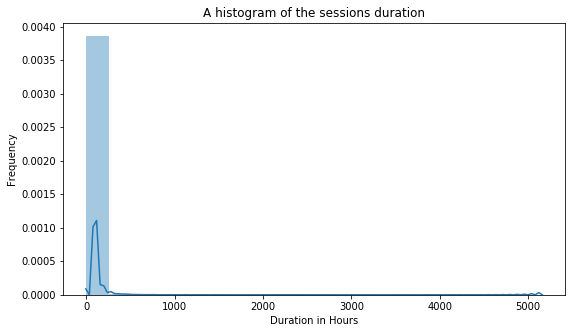

In [53]:
plt.figure(figsize=(9,5))
ax = sns.distplot(Telecom_filtered_data_merge_V01['Session_Duration'],bins = 20)
ax.set(xlabel="Duration in Hours", ylabel = "Frequency")
plt.title('A histogram of the sessions duration')
plt.savefig("sessions duration image.png")
plt.show()

### XDR Sessions

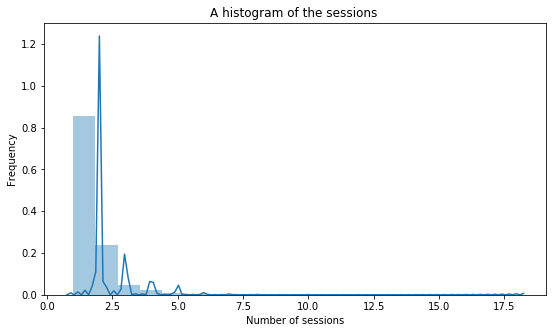

In [49]:
plt.figure(figsize=(9,5))
ax = sns.distplot(Telecom_filtered_data_merge_V01['XDR_sessions'],bins = 20)
ax.set(xlabel="Number of sessions", ylabel = "Frequency")
plt.title('A histogram of the sessions ')
plt.savefig("XDR sessions image.png")
plt.show()

#### Total Upload (DL) in bytes

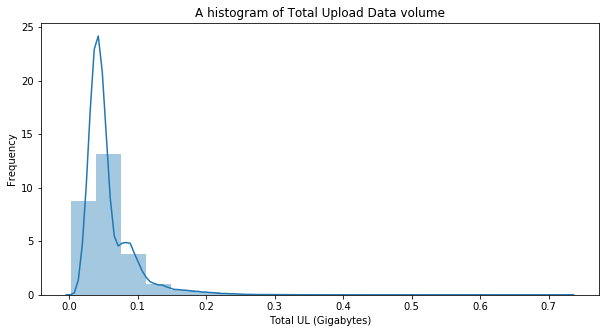

In [58]:
#plt.figure(figsize=(15,5))
#plt.hist(Telecom_filtered_data_V01['Dur. (ms)'],bins = 100)
#plt.show()
plt.figure(figsize=(10,5))
ax = sns.distplot(Telecom_filtered_data_merge_V01['Total_UL'],bins = 20)
ax.set(xlabel="Total UL (Gigabytes)", ylabel = "Frequency")
plt.title('A histogram of Total Upload Data volume')
plt.savefig("Total Upload Data volume(Gigabytes).png")
plt.show()

### Total Download (DL) in bytes

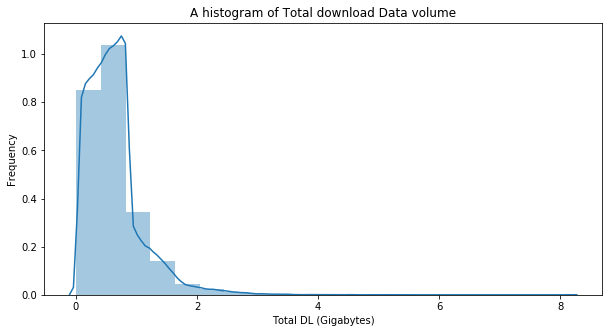

In [59]:
plt.figure(figsize=(10,5))
ax = sns.distplot(Telecom_filtered_data_merge_V01['Total_DL'],bins = 20)
ax.set(xlabel="Total DL (Gigabytes)", ylabel = "Frequency")
plt.title('A histogram of Total download Data volume')
plt.savefig("Total download Data volume(Gigabytes).png")
plt.show()

### Total Social Media (Data Volume) in bytes

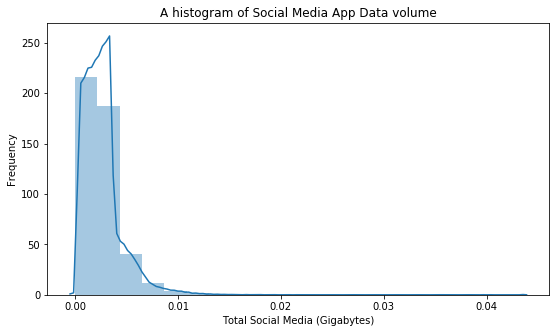

In [60]:
plt.figure(figsize=(9,5))
ax = sns.distplot(Telecom_filtered_data_merge_V01['Total_DV_SocialMedia'],bins = 20)
ax.set(xlabel="Total Social Media (Gigabytes)", ylabel = "Frequency")
plt.title('A histogram of Social Media App Data volume')
plt.savefig("Social Media App Data volume(Gigabytes).png")
plt.show()

### Total_DV_Google (Data Volume) in bytes

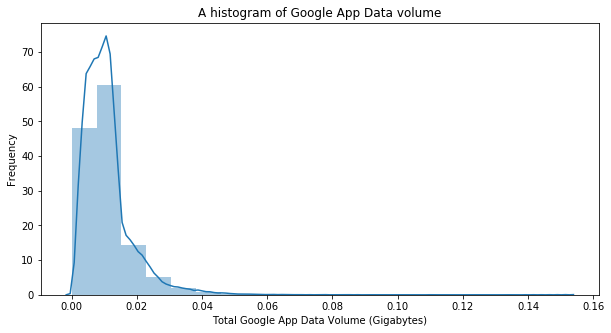

In [61]:
plt.figure(figsize=(10,5))
ax = sns.distplot(Telecom_filtered_data_merge_V01['Total_DV_Google'],bins = 20)
ax.set(xlabel="Total Google App Data Volume (Gigabytes)", ylabel = "Frequency")
plt.title('A histogram of Google App Data volume')
plt.savefig("Google App Data volume Data volume(Gigabytes).png")
plt.show()

### Total email (Data Volume) in bytes

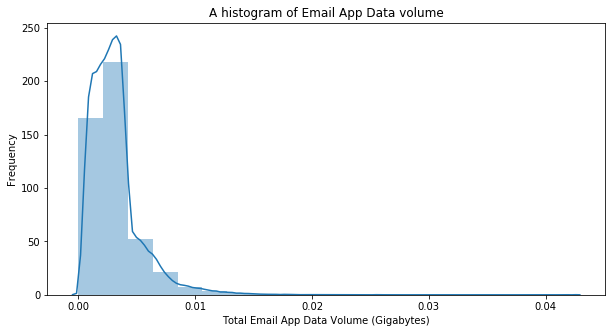

In [62]:
plt.figure(figsize=(10,5))
ax = sns.distplot(Telecom_filtered_data_merge_V01['Total_DV_Email'],bins = 20)
ax.set(xlabel="Total Email App Data Volume (Gigabytes)", ylabel = "Frequency")
plt.title('A histogram of Email App Data volume')
plt.savefig("Email App Data volume Data volume(Bytes).png")
plt.show()

### Total Netflix (Data Volume) in bytes

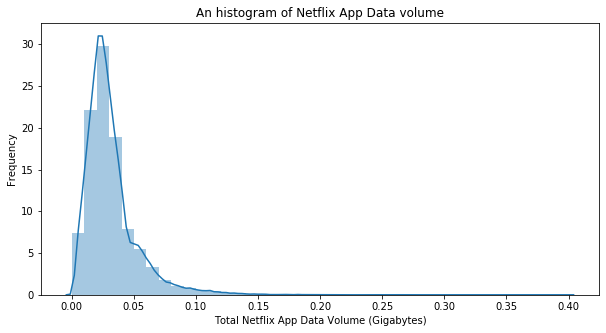

In [63]:
plt.figure(figsize=(10,5))
ax = sns.distplot(Telecom_filtered_data_merge_V01['Total_DV_Netflix'],bins = 40)
ax.set(xlabel="Total Netflix App Data Volume (Gigabytes)", ylabel = "Frequency")
plt.title('An histogram of Netflix App Data volume')
plt.savefig("Netflix App Data volume Data volume(Bytes).png")
plt.show()

### Total Gaming (Data Volume) in bytes

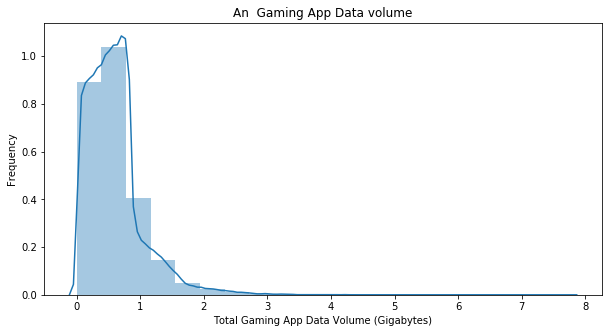

In [64]:
plt.figure(figsize=(10,5))
ax = sns.distplot(Telecom_filtered_data_merge_V01['Total_DV_Gaming'],bins = 20)
ax.set(xlabel="Total Gaming App Data Volume (Gigabytes)", ylabel = "Frequency")
plt.title('An  Gaming App Data volume')
plt.savefig("Gaming App Data volume Data volume(Bytes).png")
plt.show()

### You tube (Data Volume) in bytes

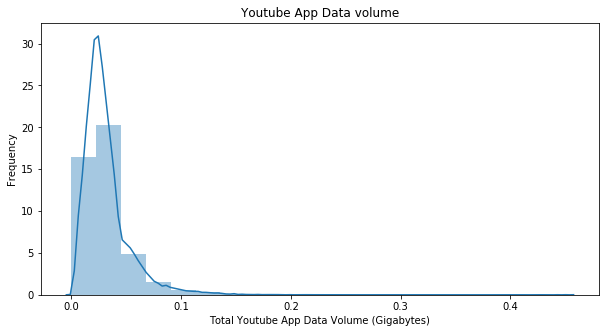

In [65]:
plt.figure(figsize=(10,5))
ax = sns.distplot(Telecom_filtered_data_merge_V01['Total_DV_Youtube'],bins = 20)
ax.set(xlabel="Total Youtube App Data Volume (Gigabytes)", ylabel = "Frequency")
plt.title('Youtube App Data volume')
plt.savefig("Youtube App Data volume Data volume(Bytes).png")
plt.show()

## Bivariate Analysis 

### Data consumption of applications  VS total data consumption.

<Figure size 720x360 with 0 Axes>

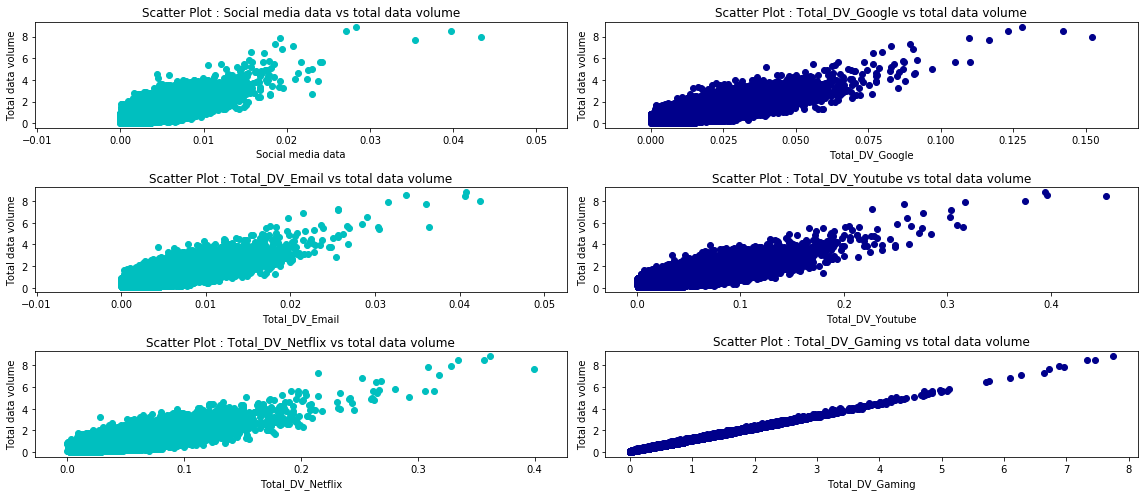

In [66]:
plt.figure(figsize=(10,5))
f, ax_arr = plt.subplots(3,2, figsize=(16,7))
# Social data plot
ax_arr[0,0].scatter(Telecom_filtered_data_merge_V01.Total_DV_SocialMedia, Telecom_filtered_data_merge_V01.Total_DataVolume, color='c')
ax_arr[0,0].set_title('Scatter Plot : Social media data vs total data volume')
ax_arr[0,0].set_xlabel('Social media data')
ax_arr[0,0].set_ylabel('Total data volume')
# Google data plot
ax_arr[0,1].scatter(Telecom_filtered_data_merge_V01.Total_DV_Google, Telecom_filtered_data_merge_V01.Total_DataVolume, color='darkblue')
ax_arr[0,1].set_title('Scatter Plot : Total_DV_Google vs total data volume')
ax_arr[0,1].set_xlabel('Total_DV_Google')
ax_arr[0,1].set_ylabel('Total data volume')
# Email data plot
ax_arr[1,0].scatter(Telecom_filtered_data_merge_V01.Total_DV_Email, Telecom_filtered_data_merge_V01.Total_DataVolume, color='c')
ax_arr[1,0].set_title('Scatter Plot : Total_DV_Email vs total data volume')
ax_arr[1,0].set_xlabel('Total_DV_Email')
ax_arr[1,0].set_ylabel('Total data volume')
# Youtube data plot
ax_arr[1,1].scatter(Telecom_filtered_data_merge_V01.Total_DV_Youtube, Telecom_filtered_data_merge_V01.Total_DataVolume, color='darkblue')
ax_arr[1,1].set_title('Scatter Plot : Total_DV_Youtube vs total data volume')
ax_arr[1,1].set_xlabel('Total_DV_Youtube')
ax_arr[1,1].set_ylabel('Total data volume')
# Netflix data plot
ax_arr[2,0].scatter(Telecom_filtered_data_merge_V01.Total_DV_Netflix, Telecom_filtered_data_merge_V01.Total_DataVolume, color='c')
ax_arr[2,0].set_title('Scatter Plot : Total_DV_Netflix vs total data volume')
ax_arr[2,0].set_xlabel('Total_DV_Netflix')
ax_arr[2,0].set_ylabel('Total data volume')
# Gaming data plot
ax_arr[2,1].scatter(Telecom_filtered_data_merge_V01.Total_DV_Gaming, Telecom_filtered_data_merge_V01.Total_DataVolume, color='darkblue')
ax_arr[2,1].set_title('Scatter Plot : Total_DV_Gaming vs total data volume')
ax_arr[2,1].set_xlabel('Total_DV_Gaming')
ax_arr[2,1].set_ylabel('Total data volume')
plt.tight_layout()
plt.savefig("Correlation analysis.png")
plt.show()

## Variable transformation

In [149]:
# sorting the dataframe using 'Session_Duration' column
sorted_df = Telecom_filtered_data_merge_V01[['MSISDN/Number', 'XDR_sessions', 'Session_Duration','Total_DataVolume']]
sorted_df = sorted_df.sort_values(by='Session_Duration', ascending=False)
sorted_df = sorted_df.reset_index(drop=True)
sorted_df = sorted_df.head(50)
Decile = ["First_decile",	"First_decile",	"First_decile",	"First_decile",	"First_decile",	"First_decile",	"First_decile",	"First_decile",	"First_decile",	"First_decile",
            "Second_decile",	"Second_decile",	"Second_decile",	"Second_decile",	"Second_decile",	"Second_decile",	"Second_decile",	"Second_decile",	"Second_decile",	"Second_decile",
            "Third_decile",	"Third_decile",	"Third_decile",	"Third_decile",	"Third_decile",	"Third_decile",	"Third_decile",	"Third_decile",	"Third_decile",	"Third_decile",
            "Forth_decile",	"Forth_decile",	"Forth_decile",	"Forth_decile",	"Forth_decile",	"Forth_decile",	"Forth_decile",	"Forth_decile",	"Forth_decile",	"Forth_decile",
            "Fifth_decile",	"Fifth_decile",	"Fifth_decile",	"Fifth_decile",	"Fifth_decile",	"Fifth_decile",	"Fifth_decile",	"Fifth_decile",	"Fifth_decile",	"Fifth_decile",
            ]
sorted_df['Decile'] = Decile
#import numpy as np    
#sorted_df['Decile'] = np.where((sorted_df.index<10) |(sorted_df.index>+10) , 'first_decile', 'good')
sorted_df = sorted_df.groupby(['Decile']).agg({'Total_DataVolume': [sum]})
sorted_df.columns = ["TotalDataVolume_used"]



import dataframe_image as dfi
sorted_df  = pd.DataFrame(sorted_df)
dfi.export(sorted_df, 'Decile.png')

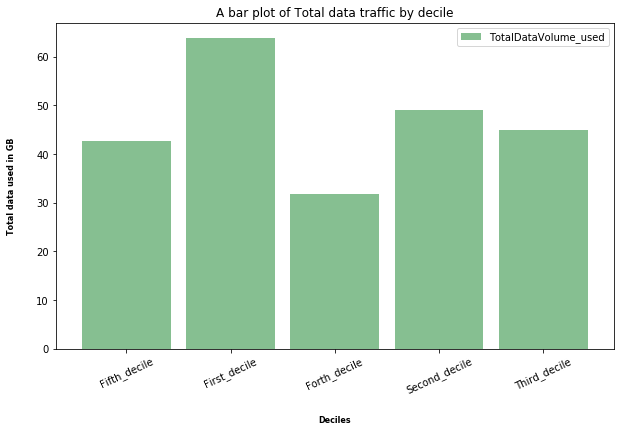

In [150]:
ax = sorted_df.plot(kind='bar', figsize=(10,6), color='#86bf91', zorder=2, width=0.85)
# Set x-axis label
ax.set_xlabel("Deciles", labelpad=20, weight='bold', size=8)

# Set y-axis label
ax.set_ylabel("Total data used in GB", labelpad=20, weight='bold', size=8)
plt.title("A bar plot of Total data traffic by decile")
plt.xticks(rotation = 25)
plt.savefig("Decile_Plot.png")
plt.show()

In [161]:
Telecom_filtered_data_merge_V01.columns

Index(['MSISDN/Number', 'XDR_sessions', 'Session_Duration', 'Total_UL',
       'Total_DL', 'Total_DataVolume', 'Total_DV_SocialMedia',
       'Total_DV_Google', 'Total_DV_Email', 'Total_DV_Youtube',
       'Total_DV_Other', 'Total_DV_Gaming', 'Total_DV_Netflix'],
      dtype='object')

### Correlation analysis

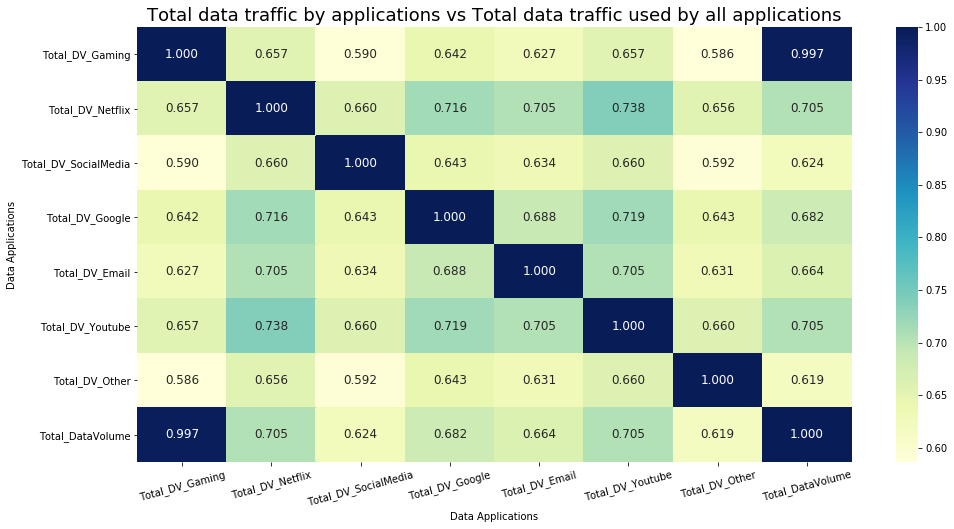

In [152]:


correlation_df = Telecom_filtered_data_merge_V01[[ 'Total_DV_Gaming', 'Total_DV_Netflix','Total_DV_SocialMedia',
       'Total_DV_Google', 'Total_DV_Email', 'Total_DV_Youtube',
       'Total_DV_Other', 'Total_DataVolume']]
corr_table = correlation_df.iloc[:, :].corr()
corr_table
plt.figure(figsize=(16,8))
ax = sns.heatmap(corr_table, annot=True,
                fmt=".3f",
                annot_kws={'size':12},
                cmap="YlGnBu")
plt.xlabel('Data Applications')
plt.ylabel('Data Applications')
plt.title('Total data traffic by applications vs Total data traffic used by all applications', fontsize=18)
plt.tight_layout
plt.xticks(rotation = 15)
plt.savefig("Correlation_heatmap.png")
plt.show()

### Dimension functionality

In [154]:
Dimension_reduction_df =  Telecom_filtered_data_merge_V01[['MSISDN/Number', 'Total_DV_SocialMedia', 'Total_DV_Google', 'Total_DV_Email',
                                      'Total_DV_Youtube','Total_DV_Other', 'Total_DV_Gaming', 
                                     'Total_DV_Netflix', 'Total_DL', 'Total_UL', 'Total_DataVolume']]

In [155]:


# standardizing data
columns_to_standardize = ['Total_DV_SocialMedia', 'Total_DV_Google', 'Total_DV_Email',
                                      'Total_DV_Youtube','Total_DV_Other', 'Total_DV_Gaming', 
                                     'Total_DV_Netflix', 'Total_DL', 'Total_UL', 'Total_DataVolume']

x = Dimension_reduction_df[columns_to_standardize].values

x_standardized = StandardScaler().fit_transform(x)

df_temp = pd.DataFrame(x_standardized, columns=columns_to_standardize, index = Dimension_reduction_df.index)

Dimension_reduction_df[columns_to_standardize] = df_temp
Dimension_reduction_df = Dimension_reduction_df.drop(['MSISDN/Number'], axis=1)
Dimension_reduction_df

,Total_DV_SocialMedia,Total_DV_Google,Total_DV_Email,Total_DV_Youtube,Total_DV_Other,Total_DV_Gaming,Total_DV_Netflix,Total_DL,Total_UL,Total_DataVolume
0,-0.165528,-0.860647,-0.817784,-0.466491,-0.472106,0.473540,-0.204672,0.449862,-0.596125,0.382297
1,0.059013,-0.735282,0.071538,-0.898161,-0.705691,-1.068731,-0.954302,-1.104067,-0.594685,-1.087666
2,0.339437,-0.986015,0.025461,-0.480156,-0.215662,-0.135682,-0.572322,-0.165736,-0.504876,-0.193453
3,-1.188490,-0.159572,-0.388827,-1.154322,-1.254631,-0.464530,-1.390183,-0.498672,-1.037143,-0.547071
4,0.191074,1.009590,0.070498,0.468405,0.459538,1.591966,0.829678,1.570279,1.036840,1.560825
...,...,...,...,...,...,...,...,...,...,...
106851,-1.178066,-0.444167,-0.963774,-0.230599,-0.675457,0.134905,-0.781410,0.116827,-0.857968,0.048222
106852,-1.074091,-0.722711,-0.285593,-0.549750,-0.862946,-0.362387,-1.080689,-0.407010,-0.605123,-0.428985
106853,-0.960542,-0.058818,-0.732556,-0.920341,-0.285089,-0.938933,-0.232323,-0.944617,-0.561271,-0.934395
106854,-1.062039,-0.139409,0.076398,0.243089,-1.000892,-0.199547,-0.029747,-0.202383,-0.018414,-0.192798


#### PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.

In [164]:
## Principle component analysis.
#from sklearn.decomposition import PCA
pcamodel = PCA(n_components=7)
pca = pcamodel.fit_transform(Dimension_reduction_df)
pca.shape

(106856, 7)

In [167]:
principal_Df = pd.DataFrame(data = pca
             , columns = ['PC_1', 'PC_2','PC_3', 'PC_4','PC_5','PC_6', 'PC_7'])
principal_Df.head()



,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
0,-0.685328,-1.384960,0.194304,0.304069,0.369026,0.370393,0.172301
1,-2.260819,0.737906,0.545274,0.304707,-0.723288,0.116609,-0.054646
2,-0.932906,-0.263000,0.372587,0.651176,-0.439196,0.571459,-0.089353
3,-2.534785,-0.729190,0.065532,-0.476801,-0.658418,-0.768900,-0.151166
4,2.846483,-1.369304,-0.197215,-0.288897,0.536118,-0.388050,0.273548


In [179]:
print('Explained variation per principal component: {}'.format(pcamodel.explained_variance_ratio_))

Explained variation per principal component: [0.73378578 0.08960066 0.04083552 0.03876431 0.03248372 0.03027607
 0.0261429 ]


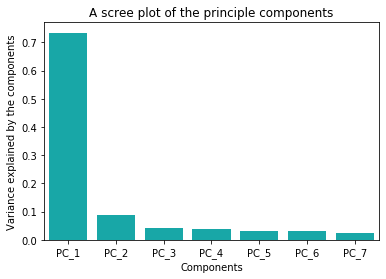

In [183]:
df = pd.DataFrame({'var':pcamodel.explained_variance_ratio_,
             'PC':['PC_1', 'PC_2','PC_3', 'PC_4','PC_5','PC_6', 'PC_7']})
sns.barplot(x='PC',y="var", 
           data=df, color="c")
plt.xlabel("Components")
plt.ylabel("Variance explained by the components")
plt.title("A scree plot of the principle components")
plt.savefig("A plot of variance explained by Components.png")
plt.show()

#### CONCLUSION: PC1 captures the most variation

In [172]:
pcamodel.explained_variance_

array([7.33792652, 0.89601496, 0.40835902, 0.38764677, 0.32484023,
       0.3027635 , 0.2614314 ])

Text(0.5, 1.0, 'explained_variance_ plot')

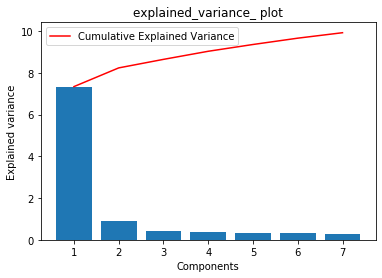

In [177]:
# explained_variance plot

plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='left')
plt.title("explained_variance_ plot")

### A plot of eigen values (explained_variance_) for each of the components

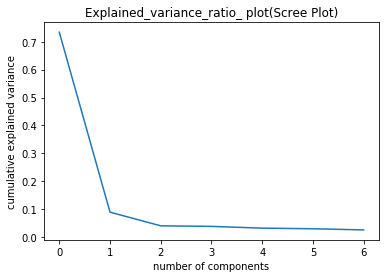

In [181]:
# explained_variance_ratio_ plot

plt.plot(pcamodel.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Explained_variance_ratio_ plot(Scree Plot)')
plt.savefig("Explained_variance_ratio_ plot(Scree Plot).png")
plt.show()


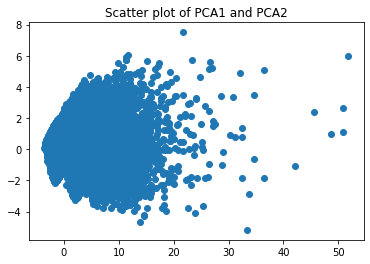

In [184]:
plt.scatter(pca[:,0], pca[:,1])
plt.title("Scatter plot of PCA1 and PCA2")
plt.savefig("Scatter plot of PCA1 and PCA2.png")
plt.show()

## User Engagement analysis

### Engagement metrics
* sessions frequency 
* duration of the session
* sessions total traffic (download and upload (bytes))


In [309]:
### Picking the variables of interest.
User_Engagement_df = Telecom_filtered_data_merge_V01[['MSISDN/Number', 'XDR_sessions', 'Session_Duration','Total_DataVolume']]


In [311]:
##Picking the variables of interest.
User_Engagement_df = User_Engagement_df[['MSISDN/Number',"XDR_sessions","Session_Duration","Total_DataVolume"]]
User_Engagement_df

,MSISDN/Number,XDR_sessions,Session_Duration,Total_DataVolume
0,3.360100e+10,1,32.422261,0.878691
1,3.360100e+10,1,50.341934,0.156860
2,3.360100e+10,1,37.491493,0.595966
3,3.360101e+10,1,13.855007,0.422321
4,3.360101e+10,2,10.306792,1.457411
...,...,...,...,...
106851,3.379000e+10,1,2.447413,0.714642
106852,3.379000e+10,1,39.163516,0.480307
106853,3.197021e+12,1,243.718146,0.232124
106854,3.370000e+14,1,70.286167,0.596288


### Top 10 customers per Session frequency

In [312]:
Session_User_engagement = User_Engagement_df.sort_values(["XDR_sessions"],ascending = False)
Session_User_engagement = Session_User_engagement.reset_index(drop = True)
Session_User_engagement = Session_User_engagement[["MSISDN/Number","XDR_sessions"]]
Session_User_engagement = Session_User_engagement[:10]
import dataframe_image as dfi
dfi.export(Session_User_engagement,"Top 10 customers per Session frequency.png")


### Top 10 customers per Session Duration

In [313]:
Duration_User_engagement = User_Engagement_df.sort_values(["Session_Duration"],ascending = False)
Duration_User_engagement = Duration_User_engagement.reset_index(drop = True)
Duration_User_engagement = Duration_User_engagement[["MSISDN/Number","Session_Duration"]]
Duration_User_engagement = Duration_User_engagement[:10]
import dataframe_image as dfi
dfi.export(Duration_User_engagement,"Top 10 customers per Session duration.png")

### Top 10 customers per total data traffic

In [314]:
traffic_User_engagement = User_Engagement_df.sort_values(["Total_DataVolume"],ascending = False)
traffic_User_engagement = traffic_User_engagement.reset_index(drop = True)
traffic_User_engagement = traffic_User_engagement[["MSISDN/Number","Total_DataVolume"]]
traffic_User_engagement_df = traffic_User_engagement[:10]
import dataframe_image as dfi
dfi.export(traffic_User_engagement_df,"Top 10 customers per total data traffic.png")

## Normalization of the engagement metrics

In [291]:
# Import required modules

min_max_scaler = MinMaxScaler()
User_Engagement_normalized = User_Engagement_df[["MSISDN/Number","XDR_sessions","Session_Duration","Total_DataVolume"]]
column_names_to_normalize = ['XDR_sessions','Session_Duration',	'Total_DataVolume']
x = User_Engagement_normalized[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = User_Engagement_normalized.index)
User_Engagement_normalized[column_names_to_normalize] = df_temp
User_Engagement_normalized.tail(15)


,MSISDN/Number,XDR_sessions,Session_Duration,Total_DataVolume
106841,3.378991e+10,0.000000,0.001998,0.098586
106842,3.378991e+10,0.000000,0.004273,0.037767
106843,3.378991e+10,0.000000,0.004915,0.056827
106844,3.378992e+10,0.000000,0.002545,0.061679
106845,3.378994e+10,0.000000,0.001600,0.018231
106846,3.378995e+10,0.058824,0.010887,0.170976
106847,3.378996e+10,0.000000,0.004943,0.069503
106848,3.378996e+10,0.000000,0.008084,0.076823
106849,3.378997e+10,0.000000,0.008267,0.019843
106850,3.378998e+10,0.058824,0.010959,0.120441


### Clustering(k= 3)

In [292]:
kmeans1 = KMeans(n_clusters=3, init='k-means++', random_state=22) 

In [293]:
User_Engagement_normalized_df = User_Engagement_normalized[['XDR_sessions', 'Session_Duration', 'Total_DataVolume']]
normalized_engagement_predicted = kmeans1.fit_predict(User_Engagement_normalized_df)
User_Engagement_normalized_df['CLUSTER'] = normalized_engagement_predicted
User_Engagement_normalized_df

,XDR_sessions,Session_Duration,Total_DataVolume,CLUSTER
0,0.000000,0.005908,0.095931,1
1,0.000000,0.009387,0.014026,1
2,0.000000,0.006892,0.063851,1
3,0.000000,0.002304,0.044148,1
4,0.058824,0.001615,0.161598,2
...,...,...,...,...
106851,0.000000,0.000090,0.077317,1
106852,0.000000,0.007217,0.050727,1
106853,0.000000,0.046922,0.022566,1
106854,0.000000,0.013258,0.063887,1


In [249]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=22) 

In [193]:
#sns.scatterplot(x=User_Engagement_normalized["Customer_ID"], y=User_Engagement_normalized["Session_Duration"], hue=User_Engagement_normalized["cluster"])
#plt.title("K-means Clustering of user's Session Duration (hrs)")
#plt.show()   

### Clustering for the non-normalized data

In [294]:
User_Engagement_df_clustered = User_Engagement_df[['MSISDN/Number','XDR_sessions', 'Session_Duration', 'Total_DataVolume']]
user_engagement_predicted_df= kmeans2.fit_predict(User_Engagement_df_clustered)

User_Engagement_df_clustered['Cluster'] = user_engagement_predicted_df
User_Engagement_df_clustered

,MSISDN/Number,XDR_sessions,Session_Duration,Total_DataVolume,Cluster
0,3.360100e+10,1,32.422261,0.878691,0
1,3.360100e+10,1,50.341934,0.156860,0
2,3.360100e+10,1,37.491493,0.595966,0
3,3.360101e+10,1,13.855007,0.422321,0
4,3.360101e+10,2,10.306792,1.457411,0
...,...,...,...,...,...
106851,3.379000e+10,1,2.447413,0.714642,0
106852,3.379000e+10,1,39.163516,0.480307,0
106853,3.197021e+12,1,243.718146,0.232124,0
106854,3.370000e+14,1,70.286167,0.596288,2


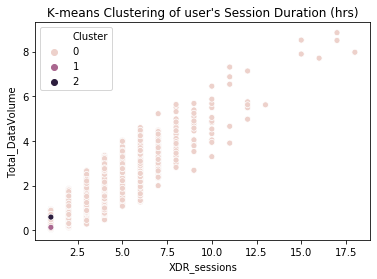

In [236]:
sns.scatterplot(x=User_Engagement_df["XDR_sessions"], y=User_Engagement_df["Total_DataVolume"], hue=User_Engagement_df["Cluster"])
plt.title("K-means Clustering of user's Session Duration (hrs)")

plt.show()

In [201]:
### Summary statistics for the non-normalized clustered data.
summary_user_engagement = User_Engagement_df.groupby(["Cluster"]).agg({"XDR_sessions": [ min, max,sum, "mean"], 
                                               "Session_Duration": [min, max,sum, "mean"],
                                               "Total_DataVolume": [min, max,sum, "mean"]})#.unstack()
summary_user_engagement.columns = ["Min_XDRSessions","Max_XDRSessions","Total_XDRSessions","Avg_XDRSessions",
                                   "Min_Duration","Max_Duration","Total_Duration","Avg_Duration",
                                   "Min_DataVolume","Max_DataVolume","Total_DataVolume","Avg_DataVolume"
                                  ]
#summary_user_engagement = summary_user_engagement.reset_index()

import dataframe_image as dfi
dfi.export(summary_user_engagement,'summary_user_engagement.png')


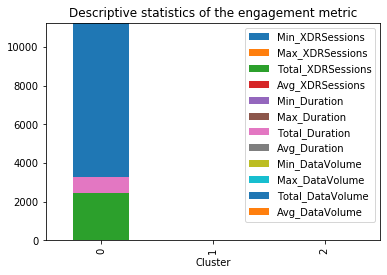

In [202]:
ax = summary_user_engagement.plot.bar(stacked = True)
plt.title("Descriptive statistics of the engagement metric")
plt.savefig("Descriptive statistics of the engagement metric.png")
plt.show()

### Aggregate user total traffic per application 

In [204]:
agg_totalDV_app = Telecom_filtered_data_V01.groupby(['MSISDN/Number']).agg({'Total_DV_SocialMedia': [sum],'Total_DV_Google': [sum],
                                                     'Total_DV_Email': [sum],'Total_DV_Youtube': [sum],
                                                      'Total_DV_Other': [sum],'Total_DV_Gaming': [sum],
                                                      'Total_DV_Netflix': [sum]})
agg_totalDV_app.columns = ['Total_DV_SocialMedia','Total_DV_Google','Total_DV_Email','Total_DV_Youtube','Total_DV_Other','Total_DV_Gaming','Total_DV_Netflix']
agg_totalDV_app = agg_totalDV_app.reset_index()
agg_totalDV_app 

,MSISDN/Number,Total_DV_SocialMedia,Total_DV_Google,Total_DV_Email,Total_DV_Youtube,Total_DV_Other,Total_DV_Gaming,Total_DV_Netflix
0,3.360100e+10,2232135.0,4389005.0,1331362.0,21624548.0,386570872.0,8.124587e+08,27180981.0
1,3.360100e+10,2660565.0,5334863.0,3307781.0,12432223.0,281710071.0,1.197501e+08,11221763.0
2,3.360100e+10,3195623.0,3443126.0,3205380.0,21333570.0,501693672.0,5.388277e+08,19353900.0
3,3.360101e+10,280294.0,9678493.0,2284670.0,6977321.0,35279702.0,3.911261e+08,1942092.0
4,3.360101e+10,2912542.0,18499616.0,3305469.0,41533002.0,804804484.0,1.314798e+09,49201724.0
...,...,...,...,...,...,...,...,...
106851,3.379000e+10,300183.0,7531269.0,1006915.0,26647843.0,295282817.0,6.603614e+08,14902538.0
106852,3.379000e+10,498569.0,5429705.0,2514097.0,19851572.0,211115113.0,4.370033e+08,8531060.0
106853,3.197021e+12,715224.0,10438660.0,1520771.0,11959905.0,470526473.0,1.780487e+08,26592300.0
106854,3.370000e+14,521566.0,9830617.0,3318582.0,36734940.0,149188439.0,5.101427e+08,30905042.0


In [205]:
agg_socialmedia = agg_totalDV_app.sort_values(by = 'Total_DV_SocialMedia',ascending = False)
agg_socialmedia = agg_socialmedia['MSISDN/Number'].head(10)
agg_socialmedia = pd.DataFrame(agg_socialmedia)
agg_socialmedia.columns = ['Social media user']
agg_socialmedia = agg_socialmedia.reset_index(drop = True)

agg_google = agg_totalDV_app.sort_values(by = 'Total_DV_Google',ascending = False)
agg_google = agg_google['MSISDN/Number'].head(10)
agg_google = pd.DataFrame(agg_google)
agg_google.columns = ['Google user']
agg_google = agg_google.reset_index(drop = True)

agg_email = agg_totalDV_app.sort_values(by = 'Total_DV_Email',ascending = False)
agg_email = agg_email['MSISDN/Number'].head(10)
agg_email = pd.DataFrame(agg_email)
agg_email.columns = ['email user']
agg_email = agg_email.reset_index(drop = True)

agg_youtube = agg_totalDV_app.sort_values(by = 'Total_DV_Youtube',ascending = False)
agg_youtube = agg_youtube['MSISDN/Number'].head(10)
agg_youtube = pd.DataFrame(agg_youtube)
agg_youtube.columns = ['You tube user']
agg_youtube = agg_youtube.reset_index(drop = True)

agg_other = agg_totalDV_app.sort_values(by = 'Total_DV_Other',ascending = False)
agg_other = agg_other['MSISDN/Number'].head(10)
agg_other = pd.DataFrame(agg_other)
agg_other.columns = ['Other app user']
agg_other = agg_other.reset_index(drop = True)

agg_gaming = agg_totalDV_app.sort_values(by = 'Total_DV_Gaming',ascending = False)
agg_gaming = agg_gaming['MSISDN/Number'].head(10)
agg_gaming = pd.DataFrame(agg_gaming)
agg_gaming.columns = ['Gaming app user']
agg_gaming = agg_gaming.reset_index(drop = True)

agg_netflix = agg_totalDV_app.sort_values(by = 'Total_DV_Netflix',ascending = False)
agg_netflix = agg_netflix['MSISDN/Number'].head(10)
agg_netflix = pd.DataFrame(agg_netflix)
agg_netflix.columns = ['Netflix app user']
agg_netflix = agg_netflix.reset_index(drop = True)

###Concatenating.
#### Merging the dataframe.
merged_totaltraffic = pd.concat([agg_socialmedia,agg_google,agg_email,agg_youtube,agg_other,agg_gaming,
                    agg_netflix],axis = 1)

merged_totaltraffic

import dataframe_image as dfi
dfi.export(merged_totaltraffic,"top 10 most engaged users .png")

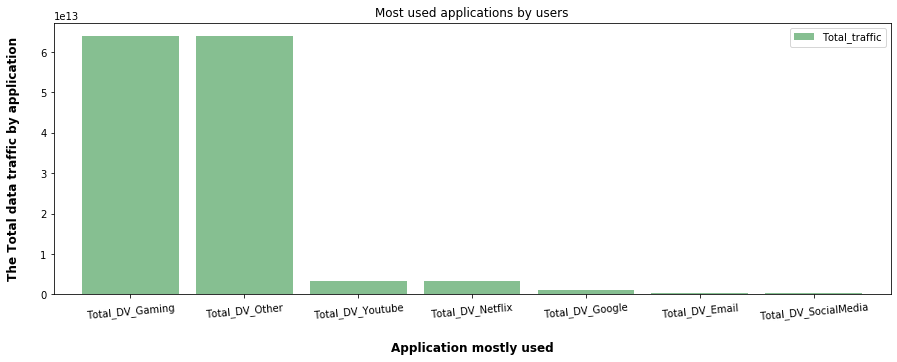

In [315]:
### Top 3 most  used applications
agg_totalDV_app_top = agg_totalDV_app.agg({'Total_DV_SocialMedia':sum,'Total_DV_Google':sum,
                                          'Total_DV_Email':sum,'Total_DV_Youtube':sum,
                                          'Total_DV_Other':sum,'Total_DV_Gaming':sum,
                                          'Total_DV_Netflix':sum})
agg_totalDV_app_top = pd.DataFrame(agg_totalDV_app_top)
agg_totalDV_app_top =agg_totalDV_app_top#.reset_index()
agg_totalDV_app_top.columns = ["Total_traffic"] #"App used",
agg_totalDV_app_top = agg_totalDV_app_top.sort_values(by = "Total_traffic", ascending  = False)
agg_totalDV_app_top = agg_totalDV_app_top
agg_totalDV_app_top

ax = agg_totalDV_app_top.plot(kind='bar', figsize=(15, 5), color='#86bf91', zorder=2, width=0.85)
# Set x-axis label
ax.set_xlabel("Application mostly used", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("The Total data traffic by application", labelpad=20, weight='bold', size=12)
plt.title("Most used applications by users")
plt.xticks(rotation = 5)
plt.savefig("top 3 most used applications.png")  
plt.show()

### Optimized value of k

<function matplotlib.pyplot.show(*args, **kw)>

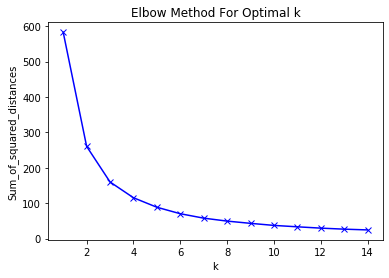

In [226]:
data = Telecom_filtered_data_merge_V01[[ 'XDR_sessions', 'Session_Duration','Total_DataVolume']]

#continuous_features = ['XDR_sessions', 'Session_Duration','Total_DataVolume']'MSISDN/Number',

mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.savefig("Elbow Method For Optimal k.png")
plt.show




## User Experience Analytics 
#### TCP DL Retrans. Vol (Bytes)
#### TCP UL Retrans. Vol (Bytes)
##### Avg RTT DL (ms)
##### Avg RTT UL (ms)
##### Avg Bearer TP DL (kbps)
##### Avg Bearer TP UL (kbps)

In [206]:
Experience_analytics_df = Telecom_filtered_data[['MSISDN/Number','Bearer Id','Handset Type','Avg_RTT_DL', 'Avg_RTT_UL', 'Avg_TP_DL', 'Avg_TP_UL',
       'TCP_DL_Retrans', 'TCP_UL_Retrans','Total_RTT_DL', 'Total_TP_DL',
       'Total_TCP_Retrans']]



In [207]:
##Converting Total data volume bytes into GB's
#A GB is 1000000000 bytes.
Experience_analytics_df.eval('TCP_UL_Retrans = TCP_UL_Retrans / 1000000000',inplace = True )
Experience_analytics_df.eval('TCP_DL_Retrans = TCP_DL_Retrans / 1000000000',inplace = True )
Experience_analytics_df.eval('Total_TCP_Retrans = Total_TCP_Retrans / 1000000000',inplace = True )
Experience_analytics_df

,MSISDN/Number,Bearer Id,Handset Type,Avg_RTT_DL,Avg_RTT_UL,Avg_TP_DL,Avg_TP_UL,TCP_DL_Retrans,TCP_UL_Retrans,Total_RTT_DL,Total_TP_DL,Total_TCP_Retrans
0,3.366496e+10,13114483460844900352,Samsung Galaxy A5 Sm-A520F,42.000000,5.000000,23.0,44.0,0.020810,0.000760,47.000000,67.0,0.021570
1,3.368185e+10,13114483482878900224,Samsung Galaxy J5 (Sm-J530),65.000000,5.000000,16.0,26.0,0.020810,0.000760,70.000000,42.0,0.021570
2,3.376063e+10,13114483484080500736,Samsung Galaxy A8 (2018),109.795706,17.662883,6.0,9.0,0.020810,0.000760,127.458589,15.0,0.021570
3,3.375034e+10,13114483485442799616,undefined,109.795706,17.662883,44.0,44.0,0.020810,0.000760,127.458589,88.0,0.021570
4,3.369980e+10,13114483499480700928,Samsung Sm-G390F,109.795706,17.662883,6.0,9.0,0.020810,0.000760,127.458589,15.0,0.021570
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,3.366865e+10,13042425979329300480,undefined,313.000000,9.000000,63420.0,1393.0,0.016553,0.000163,322.000000,64813.0,0.016715
149996,3.365069e+10,7277825670196679680,Apple iPhone 8 Plus (A1897),32.000000,0.000000,52.0,65.0,0.020810,0.000760,32.000000,117.0,0.021570
149997,3.366345e+10,7349883264234609664,Apple iPhone Se (A1723),27.000000,2.000000,23.0,54.0,0.020810,0.000760,29.000000,77.0,0.021570
149998,3.362189e+10,13114483573367300096,Apple iPhone Xs (A2097),43.000000,6.000000,43.0,47.0,0.020810,0.000760,49.000000,90.0,0.021570


###  Average TCP retransmission per user(GB)

In [208]:
TCP_agg = Experience_analytics_df.groupby(['MSISDN/Number']).agg({'TCP_DL_Retrans': [sum],'TCP_UL_Retrans': [sum],'Total_TCP_Retrans': [sum]})
TCP_agg.columns = ['TCP_DL_Retrans','TCP_UL_Retrans','Total_TCP_Retrans']
TCP_agg = TCP_agg.reset_index()
TCP_agg

,MSISDN/Number,TCP_DL_Retrans,TCP_UL_Retrans,Total_TCP_Retrans
0,3.360100e+10,0.020810,0.000760,0.021570
1,3.360100e+10,0.020810,0.000760,0.021570
2,3.360100e+10,0.020810,0.000760,0.021570
3,3.360101e+10,0.000001,0.000760,0.000761
4,3.360101e+10,0.030160,0.000781,0.030940
...,...,...,...,...
106851,3.379000e+10,0.000215,0.000003,0.000218
106852,3.379000e+10,0.020810,0.000760,0.021570
106853,3.197021e+12,0.020810,0.000760,0.021570
106854,3.370000e+14,0.020810,0.000760,0.021570


### Aggregate Average RTT per user(ms)

In [209]:
RTT_agg = Experience_analytics_df.groupby(['MSISDN/Number']).agg({'Avg_RTT_DL': [sum],'Avg_RTT_UL': [sum],'Total_RTT_DL': [sum]})
RTT_agg.columns = ['Avg_RTT_DL','Avg_RTT_UL','Total_RTT_DL']
RTT_agg = RTT_agg.reset_index()
RTT_agg

,MSISDN/Number,Avg_RTT_DL,Avg_RTT_UL,Total_RTT_DL
0,3.360100e+10,46.000000,0.000000,46.000000
1,3.360100e+10,30.000000,1.000000,31.000000
2,3.360100e+10,109.795706,17.662883,127.458589
3,3.360101e+10,69.000000,15.000000,84.000000
4,3.360101e+10,114.000000,5.000000,119.000000
...,...,...,...,...
106851,3.379000e+10,42.000000,10.000000,52.000000
106852,3.379000e+10,34.000000,6.000000,40.000000
106853,3.197021e+12,109.795706,17.662883,127.458589
106854,3.370000e+14,109.795706,17.662883,127.458589


### Average throughput  per user(Kbps)

In [210]:
RT_agg = Experience_analytics_df.groupby(['MSISDN/Number']).agg({'Avg_TP_UL': [sum],'Avg_TP_DL': [sum],'Total_TP_DL': [sum]})
RT_agg.columns = ['Avg_TP_UL','Avg_TP_DL','Total_TP_DL']
RT_agg = RT_agg.reset_index()
RT_agg

,MSISDN/Number,Avg_TP_UL,Avg_TP_DL,Total_TP_DL
0,3.360100e+10,39.0,37.0,76.0
1,3.360100e+10,51.0,48.0,99.0
2,3.360100e+10,49.0,48.0,97.0
3,3.360101e+10,44.0,204.0,248.0
4,3.360101e+10,16449.0,40395.0,56844.0
...,...,...,...,...
106851,3.379000e+10,387.0,9978.0,10365.0
106852,3.379000e+10,48.0,68.0,116.0
106853,3.197021e+12,0.0,1.0,1.0
106854,3.370000e+14,22.0,11.0,33.0


### Aggregate Handset type per user.

In [211]:
handset_agg = Experience_analytics_df.groupby(['MSISDN/Number']).agg({'Handset Type':'count'})
handset_agg.columns = ['HandsetType_count']
handset_agg = handset_agg.reset_index()
handset_agg

,MSISDN/Number,HandsetType_count
0,3.360100e+10,1
1,3.360100e+10,1
2,3.360100e+10,1
3,3.360101e+10,1
4,3.360101e+10,2
...,...,...
106851,3.379000e+10,1
106852,3.379000e+10,1
106853,3.197021e+12,1
106854,3.370000e+14,1


In [212]:
Experience_analytics_merge1 = pd.merge(handset_agg, RT_agg, on='MSISDN/Number')
Experience_analytics_merge2 = pd.merge(Experience_analytics_merge1,RTT_agg,on='MSISDN/Number')
Experience_analytics_merged_df = pd.merge(Experience_analytics_merge2,TCP_agg,on='MSISDN/Number')
Experience_analytics_merged_df

,MSISDN/Number,HandsetType_count,Avg_TP_UL,Avg_TP_DL,Total_TP_DL,Avg_RTT_DL,Avg_RTT_UL,Total_RTT_DL,TCP_DL_Retrans,TCP_UL_Retrans,Total_TCP_Retrans
0,3.360100e+10,1,39.0,37.0,76.0,46.000000,0.000000,46.000000,0.020810,0.000760,0.021570
1,3.360100e+10,1,51.0,48.0,99.0,30.000000,1.000000,31.000000,0.020810,0.000760,0.021570
2,3.360100e+10,1,49.0,48.0,97.0,109.795706,17.662883,127.458589,0.020810,0.000760,0.021570
3,3.360101e+10,1,44.0,204.0,248.0,69.000000,15.000000,84.000000,0.000001,0.000760,0.000761
4,3.360101e+10,2,16449.0,40395.0,56844.0,114.000000,5.000000,119.000000,0.030160,0.000781,0.030940
...,...,...,...,...,...,...,...,...,...,...,...
106851,3.379000e+10,1,387.0,9978.0,10365.0,42.000000,10.000000,52.000000,0.000215,0.000003,0.000218
106852,3.379000e+10,1,48.0,68.0,116.0,34.000000,6.000000,40.000000,0.020810,0.000760,0.021570
106853,3.197021e+12,1,0.0,1.0,1.0,109.795706,17.662883,127.458589,0.020810,0.000760,0.021570
106854,3.370000e+14,1,22.0,11.0,33.0,109.795706,17.662883,127.458589,0.020810,0.000760,0.021570


In [213]:
Experience_analytics_merged_df.columns

Index(['MSISDN/Number', 'HandsetType_count', 'Avg_TP_UL', 'Avg_TP_DL',
       'Total_TP_DL', 'Avg_RTT_DL', 'Avg_RTT_UL', 'Total_RTT_DL',
       'TCP_DL_Retrans', 'TCP_UL_Retrans', 'Total_TCP_Retrans'],
      dtype='object')

In [266]:
Experience_analytics_merged_V01 = Experience_analytics_merged_df[['MSISDN/Number', 'Total_TP_DL','Total_RTT_DL',
        'Total_TCP_Retrans']]


In [267]:
Top_TP = Experience_analytics_merged_V01.sort_values(by = 'Total_TP_DL',ascending = False)
Top_TP_values = Top_TP["Total_TP_DL"]
##Top 
Top_TP = Top_TP_values[:10]
Top_TP = pd.DataFrame(Top_TP)
Top_TP.columns = ["Top_TP_values"]
Top_TP =Top_TP.reset_index(drop = True)
##Bottom
##Bottom
Bottom_TP = Top_TP_values.tail(10)
Bottom_TP = pd.DataFrame(Bottom_TP)
Bottom_TP.columns = ["Bottom_TP_values"]
Bottom_TP = Bottom_TP.reset_index(drop = True)
#most frequently
TP_frequently_used = Experience_analytics_merged_V01['Total_TP_DL'].value_counts()
TP_frequently_used = TP_frequently_used.head(10)
TP_frequently_used = pd.DataFrame(TP_frequently_used)
TP_frequently_used.columns = ['TP_frequently_used']
TP_frequently_used =TP_frequently_used.reset_index(drop = True)


In [268]:
Top_RTT = Experience_analytics_merged_V01.sort_values(by = 'Total_RTT_DL',ascending = False)
Top_RTT_values = Top_RTT["Total_RTT_DL"]
##Top 
Top_RTT = Top_RTT_values[:10]
Top_RTT = pd.DataFrame(Top_RTT)
Top_RTT.columns = ["Top_RTT"]
Top_RTT =Top_RTT.reset_index(drop = True)
Top_RTT
##Bottom
##Bottom
Bottom_RTT = Top_RTT_values.tail(10)
Bottom_RTT = pd.DataFrame(Bottom_RTT)
Bottom_RTT.columns = ["Bottom_RTT_values"]
Bottom_RTT = Bottom_RTT.reset_index(drop = True)
Bottom_RTT
#most frequently
RTT_frequently_used = Experience_analytics_merged_V01['Total_RTT_DL'].value_counts()
RTT_frequently_used = RTT_frequently_used.head(10)
RTT_frequently_used = pd.DataFrame(RTT_frequently_used)
RTT_frequently_used.columns = ['RTT_frequently_used']
RTT_frequently_used =RTT_frequently_used.reset_index(drop = True)

In [269]:
Top_TCP = Experience_analytics_merged_V01.sort_values(by = 'Total_TCP_Retrans',ascending = False)
Top_TCP_values = Top_TCP["Total_TCP_Retrans"]
##Top 
Top_TCP = Top_TCP_values[:10]
Top_TCP = pd.DataFrame(Top_TCP)
Top_TCP.columns = ["Top_TCP_values"]
Top_TCP =Top_TCP.reset_index(drop = True)
Top_TCP
##Bottom
##Bottom
Bottom_TCP = Top_RTT_values.tail(10)
Bottom_TCP = pd.DataFrame(Bottom_TCP)
Bottom_TCP.columns = ["Bottom_TCP_values"]
Bottom_TCP = Bottom_TCP.reset_index(drop = True)
Bottom_TCP
#most frequently
TCP_frequently_used = Experience_analytics_merged_V01['Total_TCP_Retrans'].value_counts()
TCP_frequently_used = TCP_frequently_used.head(10)
TCP_frequently_used = pd.DataFrame(TCP_frequently_used)
TCP_frequently_used.columns = ['TCP_frequently_used']
TCP_frequently_used =TCP_frequently_used.reset_index(drop = True)

In [271]:
#### Merging the dataframe.
result = pd.concat([Top_TCP,Bottom_TCP,TCP_frequently_used,Top_RTT,Bottom_RTT,RTT_frequently_used,
                    Top_TP,Bottom_TP,TP_frequently_used],axis = 1)

result
#import dataframe_image as dfi
#dfi.export(result, 'Experience_frequency.png')

,Top_TCP_values,Bottom_TCP_values,TCP_frequently_used,Top_RTT,Bottom_RTT_values,RTT_frequently_used,Top_TP_values,Bottom_TP_values,TP_frequently_used
0,8.354209,10.0,47125,96924.0,10.0,16353,902222.0,0.0,2685
1,7.941860,9.0,7468,64670.0,9.0,2736,840424.0,0.0,2072
2,7.374899,9.0,1032,54848.0,9.0,2162,798342.0,0.0,1023
3,6.043978,8.0,363,46021.0,8.0,1908,690815.0,0.0,1005
4,5.879989,6.0,252,37084.0,6.0,1446,676858.0,0.0,971
5,5.593366,5.0,167,36304.0,5.0,1419,618797.0,0.0,866
6,5.566929,4.0,145,27278.0,4.0,1383,564179.0,0.0,853
7,5.195785,2.0,82,26300.0,2.0,1330,550352.0,0.0,817
8,5.179459,0.0,81,25715.0,0.0,1194,549661.0,0.0,798
9,5.165857,0.0,78,25388.0,0.0,1053,530353.0,0.0,793


### The distribution of the average throughput  per handset type 

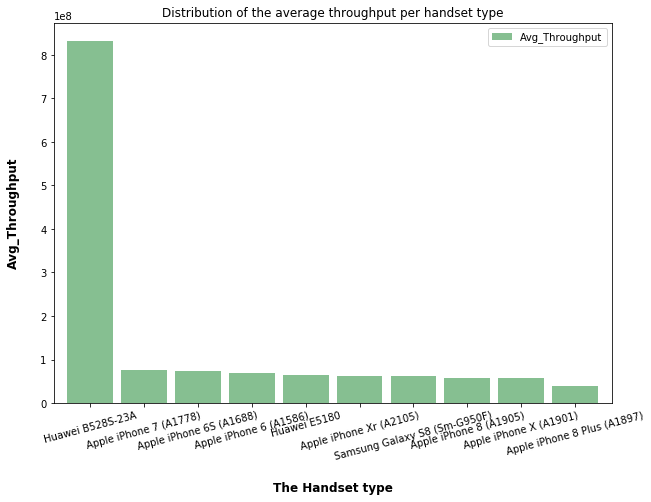

In [219]:
TP_per_handsettype_clean = Telecom_filtered_data[Telecom_filtered_data["Handset Type"] != 'undefined']
TP_per_handsettype = TP_per_handsettype_clean.groupby(['Handset Type']).agg({'Total_TP_DL': [sum]})
TP_per_handsettype.columns = ["Avg_Throughput"]
TP_per_handsettype = TP_per_handsettype.sort_values(by = 'Avg_Throughput',ascending = False)
TP_per_handsettype =TP_per_handsettype[:10]

## Visual.
ax = TP_per_handsettype.plot(kind='bar', figsize=(10 ,7), color='#86bf91', zorder=2, width=0.85)
# Set x-axis label
ax.set_xlabel("The Handset type", labelpad=20, weight='bold', size=12)
# Set y-axis label
ax.set_ylabel("Avg_Throughput", labelpad=20, weight='bold', size=12)
plt.title('Distribution of the average throughput per handset type')
plt.xticks(rotation = 15)
plt.savefig('Distribution of the average throughput per handset type.png')
plt.show()

### Average TCP retransmission view per handset type 

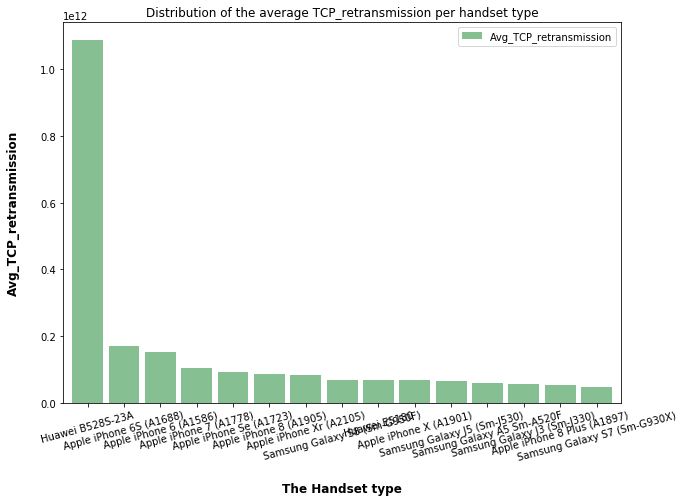

In [222]:
### Removing the handset type == undefined
TCP_per_handsettype_clean = Telecom_filtered_data[Telecom_filtered_data["Handset Type"] != 'undefined']
TCP_per_handsettype_clean.eval('Total_TCP_Retrans = Total_TCP_Retrans / 1000000000',inplace = True )
## getting the Avg_TCP retransmission per handset type.
TCP_per_handsettype = TP_per_handsettype_clean.groupby(['Handset Type']).agg({'Total_TCP_Retrans': [sum]})
TCP_per_handsettype.columns = ["Avg_TCP_retransmission"]
TCP_per_handsettype = TCP_per_handsettype.sort_values(by = 'Avg_TCP_retransmission',ascending = False)
TCP_per_handsettype = TCP_per_handsettype[:15]

## Visual.
ax = TCP_per_handsettype.plot(kind='bar', figsize=(10, 7), color='#86bf91', zorder=2, width=0.85)
# Set x-axis label
ax.set_xlabel("The Handset type", labelpad=20, weight='bold', size=12)
# Set y-axis label
ax.set_ylabel("Avg_TCP_retransmission", labelpad=20, weight='bold', size=12)
plt.title('Distribution of the average TCP_retransmission per handset type')
plt.xticks(rotation = 15)
plt.savefig('Distribution of the average TCP_retransmission per handset type.png')
plt.show()

### k-means clustering for experience clustering

In [277]:
kmeans3 = KMeans(n_clusters=3, init='k-means++', random_state=22)

In [278]:
Experience_analytics_clustered_df = Experience_analytics_merged_V01[["MSISDN/Number","Total_TP_DL",'Total_RTT_DL',
        'Total_TCP_Retrans']]
Experience_analytic_predicted = kmeans3.fit_predict(Experience_analytics_clustered_df[["Total_TP_DL",'Total_RTT_DL','Total_TCP_Retrans']])

In [279]:
Experience_analytics_clustered_df["Cluster"] = Experience_analytic_predicted
Experience_analytics_clustered_df

,MSISDN/Number,Total_TP_DL,Total_RTT_DL,Total_TCP_Retrans,Cluster
0,3.360100e+10,76.0,46.000000,0.021570,0
1,3.360100e+10,99.0,31.000000,0.021570,0
2,3.360100e+10,97.0,127.458589,0.021570,0
3,3.360101e+10,248.0,84.000000,0.000761,0
4,3.360101e+10,56844.0,119.000000,0.030940,1
...,...,...,...,...,...
106851,3.379000e+10,10365.0,52.000000,0.000218,0
106852,3.379000e+10,116.0,40.000000,0.021570,0
106853,3.197021e+12,1.0,127.458589,0.021570,0
106854,3.370000e+14,33.0,127.458589,0.021570,0


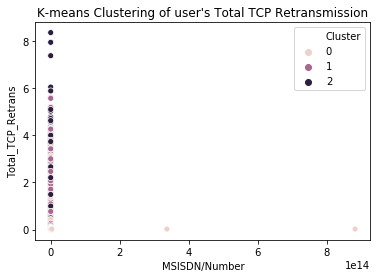

In [147]:
sns.scatterplot(x=Experience_analytics_merged_df["MSISDN/Number"], y=Experience_analytics_merged_df["Total_TCP_Retrans"], 
                hue=Experience_analytics_merged_df["Cluster"])
plt.title("K-means Clustering of user's Total TCP Retransmission")
plt.show()

## USER SATISFACTION.

### ENGAGEMENT SCORE 

In [238]:
engagement_metrics = User_Engagement_normalized.groupby("CLUSTER").agg({"XDR_sessions": "mean", 
                                               "Session_Duration": "mean",
                                               "Total_DataVolume":  "mean"})
engagement_metrics

,XDR_sessions,Session_Duration,Total_DataVolume
CLUSTER,,,
0,0.191173,0.030336,0.255092
1,0.002487,0.005384,0.052452
2,0.069203,0.011133,0.123958


In [295]:
###Getting the engagement score.
centroids = kmeans1.cluster_centers_

norm_df = User_Engagement_normalized.drop(['MSISDN/Number'], axis=1)
norm_df
eng_score = euclidean_distances(norm_df, [centroids[1]])

User_Engagement_df["Engagement_score"] = eng_score
User_Engagement_df

,MSISDN/Number,XDR_sessions,Session_Duration,Total_DataVolume,Engagement_score
0,3.360100e+10,1,32.422261,0.878691,0.043555
1,3.360100e+10,1,50.341934,0.156860,0.038712
2,3.360100e+10,1,37.491493,0.595966,0.011764
3,3.360101e+10,1,13.855007,0.422321,0.009196
4,3.360101e+10,2,10.306792,1.457411,0.122891
...,...,...,...,...,...
106851,3.379000e+10,1,2.447413,0.714642,0.025544
106852,3.379000e+10,1,39.163516,0.480307,0.003532
106853,3.197021e+12,1,243.718146,0.232124,0.051232
106854,3.370000e+14,1,70.286167,0.596288,0.014105


### Experience score

In [281]:
experience_metrics = Experience_analytics_clustered_df.groupby("Cluster").agg({"Total_TP_DL": "mean", 
                                               "Total_RTT_DL": "mean",
                                               "Total_TCP_Retrans":  "mean"})

experience_metrics	

,Total_TP_DL,Total_RTT_DL,Total_TCP_Retrans
Cluster,,,
0,4780.488239,167.293659,0.021865
1,67042.051444,182.826753,0.045051
2,209411.638662,397.168968,0.185845


In [306]:
###Getting the experience score.
min_max_scaler = MinMaxScaler()
User_Experience_normalized = Experience_analytics_merged_df[['MSISDN/Number', 'Total_TP_DL','Total_RTT_DL','Total_TCP_Retrans']]
column_names_to_normalize = ['Total_TP_DL','Total_RTT_DL', 'Total_TCP_Retrans']
x = User_Experience_normalized[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = User_Experience_normalized.index)
User_Experience_normalized[column_names_to_normalize] = df_temp
User_Experience_normalized.tail(15)

centroids = kmeans3.cluster_centers_
norm_df = User_Experience_normalized.drop(['MSISDN/Number'], axis=1)
norm_df
Experience_score = euclidean_distances(norm_df, [centroids[0]])

Experience_analytics_merged_V01["Experience_score"] = Experience_score
Experience_analytics_merged_V01

,MSISDN/Number,Total_TP_DL,Total_RTT_DL,Total_TCP_Retrans,Experience_score
0,3.360100e+10,76.0,46.000000,0.021570,4788.896970
1,3.360100e+10,99.0,31.000000,0.021570,4788.896950
2,3.360100e+10,97.0,127.458589,0.021570,4788.896918
3,3.360101e+10,248.0,84.000000,0.000761,4788.896766
4,3.360101e+10,56844.0,119.000000,0.030940,4788.834062
...,...,...,...,...,...
106851,3.379000e+10,10365.0,52.000000,0.000218,4788.885571
106852,3.379000e+10,116.0,40.000000,0.021570,4788.896928
106853,3.197021e+12,1.0,127.458589,0.021570,4788.897024
106854,3.370000e+14,33.0,127.458589,0.021570,4788.896988


### Merging the dataframes

In [297]:
User_satisfaction = pd.merge(Experience_analytics_merged_V01,User_Engagement_df,on= "MSISDN/Number")
User_satisfaction

,MSISDN/Number,Total_TP_DL,Total_RTT_DL,Total_TCP_Retrans,Experience_score,XDR_sessions,Session_Duration,Total_DataVolume,Engagement_score
0,3.360100e+10,76.0,46.000000,0.021570,67081.946024,1,32.422261,0.878691,0.043555
1,3.360100e+10,99.0,31.000000,0.021570,67081.945999,1,50.341934,0.156860,0.038712
2,3.360100e+10,97.0,127.458589,0.021570,67081.945999,1,37.491493,0.595966,0.011764
3,3.360101e+10,248.0,84.000000,0.000761,67081.945833,1,13.855007,0.422321,0.009196
4,3.360101e+10,56844.0,119.000000,0.030940,67081.883102,2,10.306792,1.457411,0.122891
...,...,...,...,...,...,...,...,...,...
106851,3.379000e+10,10365.0,52.000000,0.000218,67081.934620,1,2.447413,0.714642,0.025544
106852,3.379000e+10,116.0,40.000000,0.021570,67081.945980,1,39.163516,0.480307,0.003532
106853,3.197021e+12,1.0,127.458589,0.021570,67081.946105,1,243.718146,0.232124,0.051232
106854,3.370000e+14,33.0,127.458589,0.021570,67081.946070,1,70.286167,0.596288,0.014105


### Averaging the Experience and engagement score to get the satisfaction score

In [301]:
User_satisfaction.eval("Satisfaction_score = (Experience_score + Engagement_score)/2",inplace = True)
User_satisfaction

,MSISDN/Number,Total_TP_DL,Total_RTT_DL,Total_TCP_Retrans,Experience_score,XDR_sessions,Session_Duration,Total_DataVolume,Engagement_score,Satisfaction_score
0,3.360100e+10,76.0,46.000000,0.021570,67081.946024,1,32.422261,0.878691,0.043555,33540.994790
1,3.360100e+10,99.0,31.000000,0.021570,67081.945999,1,50.341934,0.156860,0.038712,33540.992356
2,3.360100e+10,97.0,127.458589,0.021570,67081.945999,1,37.491493,0.595966,0.011764,33540.978881
3,3.360101e+10,248.0,84.000000,0.000761,67081.945833,1,13.855007,0.422321,0.009196,33540.977514
4,3.360101e+10,56844.0,119.000000,0.030940,67081.883102,2,10.306792,1.457411,0.122891,33541.002997
...,...,...,...,...,...,...,...,...,...,...
106851,3.379000e+10,10365.0,52.000000,0.000218,67081.934620,1,2.447413,0.714642,0.025544,33540.980082
106852,3.379000e+10,116.0,40.000000,0.021570,67081.945980,1,39.163516,0.480307,0.003532,33540.974756
106853,3.197021e+12,1.0,127.458589,0.021570,67081.946105,1,243.718146,0.232124,0.051232,33540.998669
106854,3.370000e+14,33.0,127.458589,0.021570,67081.946070,1,70.286167,0.596288,0.014105,33540.980088


In [317]:
User_satisfaction = User_satisfaction.sort_values(by = 'Satisfaction_score',ascending = False)
User_satisfaction_sorted  = User_satisfaction[["MSISDN/Number","Satisfaction_score"]][:10]
User_satisfaction_sorted  = User_satisfaction_sorted.reset_index(drop= True)
User_satisfaction_sorted

,MSISDN/Number,Satisfaction_score
0,3.362578e+10,33541.678341
1,3.362632e+10,33541.601107
2,3.376054e+10,33541.531112
3,3.367588e+10,33541.461081
4,3.361489e+10,33541.454678
5,3.365973e+10,33541.424577
6,3.362708e+10,33541.411085
7,3.366469e+10,33541.383896
8,3.369879e+10,33541.381354
9,3.378632e+10,33541.375161


In [318]:
dfi.export(User_satisfaction_sorted,"User_satisfaction_sorted.png")

In [328]:
kmeans4 = KMeans(n_clusters=2, init='k-means++', random_state=22)
enge_exp_predicted = kmeans4.fit_predict(User_satisfaction[['Engagement_score', 'Experience_score']])
enge_exp_predicted
User_satisfaction['cluster_class'] = enge_exp_predicted 
User_satisfaction  

 

,MSISDN/Number,Total_TP_DL,Total_RTT_DL,Total_TCP_Retrans,Experience_score,XDR_sessions,Session_Duration,Total_DataVolume,Engagement_score,Satisfaction_score,cluster_class
13180,3.362578e+10,208539.0,735.458589,0.262183,67081.714951,17,5153.823191,8.499621,1.641731,33541.678341,1
13526,3.362632e+10,121345.0,1314.668712,0.236850,67081.811578,18,2442.204633,7.971167,1.390637,33541.601107,1
92923,3.376054e+10,185370.0,2046.585890,0.250207,67081.740594,15,2577.622778,8.514774,1.321630,33541.531112,1
76363,3.367588e+10,203594.0,1062.000000,0.167353,67081.720422,15,1351.653841,7.891111,1.201739,33541.461081,1
6437,3.361489e+10,426350.0,1398.751534,0.134418,67081.473517,17,2768.584933,8.846226,1.435839,33541.454678,1
...,...,...,...,...,...,...,...,...,...,...,...
92054,3.376018e+10,419201.0,230.000000,0.418467,67081.481473,2,47.999956,0.533012,0.056616,33540.769045,1
60763,3.366566e+10,530353.0,188.000000,0.011248,67081.358277,2,35.804604,1.459987,0.123098,33540.740688,1
73146,3.366995e+10,690815.0,370.000000,0.062718,67081.180421,4,94.453929,1.978944,0.242414,33540.711417,1
69020,3.366843e+10,676858.0,382.000000,0.787660,67081.195890,4,89.414096,1.568430,0.212671,33540.704281,1


### Aggregating the average satisfaction & experience score per cluster

In [327]:
satisf_expr_aggr = User_satisfaction['cluster_class'].agg({'Satisfaction_score': 'mean',
                                                         'Experience_score': 'mean'}) 
satisf_expr_aggr = pd.DataFrame(satisf_expr_aggr)
satisf_expr_aggr.columns = ["Average score per cluster"]

dfi.export(satisf_expr_aggr,"Average score per cluster.png")

In [322]:
User_satisfaction.columns

Index(['MSISDN/Number', 'Total_TP_DL', 'Total_RTT_DL', 'Total_TCP_Retrans',
       'Experience_score', 'XDR_sessions', 'Session_Duration',
       'Total_DataVolume', 'Engagement_score', 'Satisfaction_score',
       'cluster_class'],
      dtype='object')